In [410]:
import pandas as pd 
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

from xgboost import XGBClassifier


In [2]:
df_1 = pd.read_excel(r'C:\Desktop\risk\data.xlsx', usecols=[0, 1, 2], sheet_name = 'Лист2') #header=2)

df_2 = pd.read_excel(r'C:\Desktop\risk\data.xlsx', usecols=[7], sheet_name = 'Лист2') #header=2)
df_2 = df_2.rename(columns={'id.1': 'Название компании'})

df_sector = pd.merge(df_1, df_2, left_on=df_1.columns[1], right_on=df_2.columns[0], how = 'left')
df_sector.drop(columns=df_sector.columns[1], inplace=True)
#df_sector.drop(columns=df_sector.columns[1], inplace=True)
#df_sector.drop(columns=df_sector.columns[0], inplace=True)

data = pd.read_excel(r'C:\Desktop\risk\data.xlsx') #usecols=[0, 1, 2], sheet_name = 'Лист2')

def_df = pd.read_excel(r'C:\Desktop\risk\def.xlsx')

In [3]:
#обьдиняю чтобы дать метки дефолтным компаниями 
dfdf = pd.merge(df_sector, def_df, left_on='id', right_on='ИНН', how='left')

#осталвюя id  и отрасль для дальнейшего обьединения
df_sector_something = df_sector.iloc[:, :2]

In [4]:
#обьединяю по названию компании
data = pd.merge(data, df_sector, left_on=data.columns[0], right_on=df_sector.columns[-1], how = 'left')
#удаляю сектор названия которого нет "Unable to collect data for the field 'TR.TRBCIndustryGroup' and some specific identifier(s)."
data = data[~(data['Отрасль'] == ((data['Отрасль'].value_counts())).index[3])]

In [5]:
#убираю финансовые компании
data_2 = data[data['Отрасль'].isin((data['Отрасль'].value_counts()).index[2:])]
#удаляю столбцы где больше всего nan ( топ 5 по большинству nan)
col_value = np.sum(data_2.isna(),axis=0).sort_values(ascending= False).index[5:]
data_2 = data_2.loc[:, col_value]

#удаляю все строки где есть na
data_2 = data_2[~(data_2.isna().any(axis=1))]

#обьединяю таблицы чтобы получить код компании 
#data_2 = pd.merge(data_2, df_sector_something, left_on=data_2.columns[-1], right_on=df_sector_something.columns[1], how = 'left').drop(columns=data_2.columns[-1])
data_2.drop(columns=data_2.columns[-9], inplace=True)

In [6]:
data_2.drop_duplicates(inplace=True)

In [7]:
data_2[data_2['Название компании'].isin(['БСК',
'Балтийский Лизинг',
'Балтийский Лизинг',
'Башнефть',
'НоваБев Групп',
'Россети Центр',
'ЧТПЗ',
'Черкизово',
'Домодедово Фьюэл Фас',
'ЭнергоТехСервис'])]

Оборотные активы МИНУС деньги и эквиваленты\nв предыдущий период  \
26                                     18841000000.00                  
27                                      9061000000.00                  
35                                    559305000000.00                  
36                                     50435000000.00                  
46                                     20600671750.00                  
47                                     73357869353.52                  
48                                     91348000000.00                  
53                                      1359000000.00                  
68                                      7846726000.00                  

       FY-4_assets  Выручка в предыдущий период (за 12м)         FY-4_eq  \
26  47462000000.00                        89937000000.00  16911000000.00   
27  57390000000.00                        21972000000.00   6550000000.00   
35 787741000000.00                      1031793000000.00 470633000000.00   
36  63530000000.00                       116888000000.00  20345000000.00   
46 117862463000.00                       125207630000.00  45008701000.00   
47 148100000000.00                       145926121432.27   5748000000.00   
48 166269000000.00                       226713000000.00  71902000000.00   
53            0.00                         6097000000.00            0.00   
68   6032813000.00                         9800869000.00   1482803000.00   

              FY-4     FY-3_assets      FY-2_assets      FY-1_assets  \
26  10976000000.00  60773000000.00   71808000000.00   78939000000.00   
27   1817000000.00  79922000000.00  108516000000.00  166646000000.00   
35 -12499000000.00 916132000000.00 1021591000000.00 1127050000000.00   
36   2459000000.00  78489000000.00   93139000000.00   96244000000.00   
46   3059534000.00 121996294000.00  130349711000.00  139803807000.00   
47   9741000000.00 131600000000.00  157233000000.00  157825000000.00   
48  15145000000.00 194818000000.00  259067000000.00  283692000000.00   
53            0.00  15194000000.00   15991000000.00   17187000000.00   
68    591589000.00  10615202000.00   11883301000.00   15050226000.00   

         FY0_assets  Валовая\nприбыль  ...  \
26   82743000000.00    54498000000.00  ...   
27  171831000000.00    10636000000.00  ...   
35 1154585000000.00   194803000000.00  ...   
36  100290000000.00    45034000000.00  ...   
46  148754288000.00              0.00  ...   
47  158417000000.00    29889000000.00  ...   
48  300291000000.00    79443000000.00  ...   
53   33058000000.00      881000000.00  ...   
68   18327101000.00     4399927000.00  ...   

                               Отрасль          id    Всего Активов  \
26                           Chemicals   268008010   82743000000.00   
27  Professional & Commercial Services  7826705374  166646000000.00   
35                           Oil & Gas   274051582 1154585000000.00   
36                           Beverages  7705634425  100290000000.00   
46           Electric Utilities & IPPs  6901067107  148754288000.00   
47                     Metals & Mining  7449006730  158417000000.00   
48                      Food & Tobacco  7718560636  300291000000.00   
53            Transport Infrastructure  5009097236   33058000000.00   
68           Electric Utilities & IPPs  7203126844   18327101000.00   

           FY-1_eq          FY0_eq            FY-1             FY0  \
26  39077000000.00  38214000000.00  10710000000.00   8927000000.00   
27  20667000000.00  23748000000.00   4349000000.00   4967000000.00   
35 831797000000.00 842496000000.00 178879000000.00 155484000000.00   
36  26597000000.00  25419000000.00   8064000000.00   7035000000.00   
46  52406304000.00  60171178000.00   4905655000.00   7916238000.00   
47  31563000000.00  53134000000.00    989600000.00  12155400000.00   
48 119982000000.00 127368000000.00  33025000000.00  32455000000.00   
53    948000000.00    694000000.00    888000000.00     82000000.00   

In [9]:
#таблица с компаниями которые дефолтнулись или технические обьявили дефорт
id_data_df = dfdf[dfdf['Состояние'].notna()].groupby(['id'])['Плановая дата'].max().reset_index()

In [10]:
#чтобы понять состояние компании  обьединю две таблицы по id
dfdf = dfdf[['id', 'Плановая дата', 'Состояние']]

data_2 = pd.merge(data_2, dfdf, left_on='id', right_on='id')

In [11]:
df_default = (data_2[data_2['Состояние'].isin(['Дефолт', 'Технический дефолт'])].groupby(['Название компании', 'Состояние'])['Плановая дата'].max()).reset_index()


In [12]:
merged_df_default = pd.merge(
    data_2,
    df_default,
    on=['Название компании', 'Состояние', 'Плановая дата'],
    how='inner'
)


In [13]:
#для каждой группу выбираю макс дату
merged_df_default['max_plan_date'] = merged_df_default.groupby('Название компании')['Плановая дата'].transform('max')

In [14]:
merged_df_default.head()

Оборотные активы МИНУС деньги и эквиваленты\nв предыдущий период  \
0                                      1223141000.00                  
1                                       307345000.00                  
2                                      7763889000.00                  
3                                       609262000.00                  
4                                       609262000.00                  

    FY-4_assets  Выручка в предыдущий период (за 12м)       FY-4_eq  \
0 8510312000.00                         3588248000.00   81328000.00   
1  344352000.00                          447935000.00  165849000.00   
2 5688276000.00                        28515594000.00 1248690000.00   
3  461448000.00                          939673000.00  152772000.00   
4  461448000.00                          939673000.00  152772000.00   

           FY-4    FY-3_assets    FY-2_assets    FY-1_assets     FY0_assets  \
0 -533101000.00  8937227000.00  8011886000.00  8416206000.00  9086227000.00   
1    4865000.00   340868000.00   330806000.00   452690000.00   446806000.00   
2 1151370000.00 12644639000.00 13402262000.00 21285336000.00 19820507000.00   
3   23090000.00   644025000.00   720817000.00   836207000.00   849138000.00   
4   23090000.00   644025000.00   720817000.00   836207000.00   849138000.00   

   Валовая\nприбыль  ...        FY-1_eq         FY0_eq          FY-1  \
0     1169544000.00  ... -1798197000.00 -1784313000.00 -858113000.00   
1      275498000.00  ...   192231000.00   195940000.00    3312000.00   
2     7654062000.00  ...  3382463000.00  3658471000.00 1489246000.00   
3      213175000.00  ...   272154000.00   287777000.00   17478000.00   
4      213175000.00  ...   272154000.00   287777000.00   17478000.00   

           FY0   Total Equity  Total assets USD        Название компании  \
0  13884000.00 -1784313000.00       86215267.10  Концессии водоснабжения   
1   4421000.00   195940000.00        4585447.45                   Кузина   
2 775379000.00  3658471000.00      190143006.52              СДЭК-Глобал   
3  20991000.00   287777000.00        9108968.03          Фабрика Фаворит   
4  20991000.00   287777000.00        9108968.03          Фабрика Фаворит   

   Плановая дата           Состояние  max_plan_date  
0     2024-12-19              Дефолт     2024-12-19  
1     2025-01-14  Технический дефолт     2025-01-14  
2     2021-07-26  Технический дефолт     2021-07-26  
3     2025-01-09              Дефолт     2025-02-03  
4     2025-02-03  Технический дефолт     2025-02-03  

[5 rows x 42 columns]

In [15]:
company_def = merged_df_default[merged_df_default['Плановая дата'] == merged_df_default['max_plan_date']].drop_duplicates()

company_def.drop(columns=['max_plan_date'], inplace=True)

In [16]:
company_def.head()

Оборотные активы МИНУС деньги и эквиваленты\nв предыдущий период  \
0                                      1223141000.00                  
1                                       307345000.00                  
2                                      7763889000.00                  
4                                       609262000.00                  
5                                      1629545000.00                  

    FY-4_assets  Выручка в предыдущий период (за 12м)       FY-4_eq  \
0 8510312000.00                         3588248000.00   81328000.00   
1  344352000.00                          447935000.00  165849000.00   
2 5688276000.00                        28515594000.00 1248690000.00   
4  461448000.00                          939673000.00  152772000.00   
5  702905000.00                         1616012000.00    9238000.00   

           FY-4    FY-3_assets    FY-2_assets    FY-1_assets     FY0_assets  \
0 -533101000.00  8937227000.00  8011886000.00  8416206000.00  9086227000.00   
1    4865000.00   340868000.00   330806000.00   452690000.00   446806000.00   
2 1151370000.00 12644639000.00 13402262000.00 21285336000.00 19820507000.00   
4   23090000.00   644025000.00   720817000.00   836207000.00   849138000.00   
5   32928000.00  1399830000.00  1565857000.00  1860069000.00  1928916000.00   

   Валовая\nприбыль  ...  Всего Активов        FY-1_eq         FY0_eq  \
0     1169544000.00  ...  9086227000.00 -1798197000.00 -1784313000.00   
1      275498000.00  ...   446806000.00   192231000.00   195940000.00   
2     7654062000.00  ... 19820507000.00  3382463000.00  3658471000.00   
4      213175000.00  ...   849138000.00   272154000.00   287777000.00   
5      265861000.00  ...  1928916000.00   145434000.00   177844000.00   

           FY-1          FY0   Total Equity Total assets USD  \
0 -858113000.00  13884000.00 -1784313000.00      86215267.10   
1    3312000.00   4421000.00   195940000.00       4585447.45   
2 1489246000.00 775379000.00  3658471000.00     190143006.52   
4   17478000.00  20991000.00   287777000.00       9108968.03   
5   26430000.00  12657000.00   177844000.00      19670773.00   

         Название компании  Плановая дата           Состояние  
0  Концессии водоснабжения     2024-12-19              Дефолт  
1                   Кузина     2025-01-14  Технический дефолт  
2              СДЭК-Глобал     2021-07-26  Технический дефолт  
4          Фабрика Фаворит     2025-02-03  Технический дефолт  
5                     НИКА     2025-01-28              Дефолт  

[5 rows x 41 columns]

In [17]:
data_2 = data_2.drop(index=data_2[data_2['Состояние'].isin(data_2['Состояние'].value_counts().index)].index)

In [18]:
data_2 = pd.concat([data_2, company_def], axis=0)
data_2.drop(columns='Плановая дата', inplace=True)

In [19]:
#компании дефолт по которым есть данные 
#company_def = data_2[data_2['Состояние'].isin((data_2['Состояние'].value_counts()).index)].drop_duplicates()

In [20]:
#dfdf[dfdf['Название компании'].isin((dfdf[dfdf['Состояние'].isin((dfdf['Состояние'].value_counts()).index)]['Название компании'].value_counts()).to_frame().index[1:3])]

In [21]:
data_2.loc[data_2['Состояние'].isna(), 'Состояние'] = 'Нет дефолта'

In [22]:
data_2 = data_2.drop_duplicates()

In [23]:
data_2.loc[np.sum(data_2.isna(), axis=1) > 1, :]

Empty DataFrame
Columns: [Оборотные активы МИНУС деньги и эквиваленты
в предыдущий период, FY-4_assets, Выручка в предыдущий период (за 12м), FY-4_eq, FY-4, FY-3_assets, FY-2_assets, FY-1_assets, FY0_assets, Валовая
прибыль, FY-3, Краткосрочные
фин вложения, FY-3_eq, CFI, CFO, Выручка, Рейтинг УК 'Доходъ', Запасы, Краткосрочные
обязательства, Оборотные
активы, Внеоборотные активы, FY-2, Долгосрочные
обязательства, Net Income After Taxes, FY-2_eq, Дебиторская
задолженность, Уставной
капитал, Total Debt, Cash and eq, Отрасль, id, Всего Активов, FY-1_eq, FY0_eq, FY-1, FY0, Total Equity, Total assets USD, Название компании, Состояние]
Index: []

[0 rows x 40 columns]

In [24]:
data_2['zeros'] = np.sum(data_2.isin([0]), axis=1)

In [25]:
stat_non = data_2.groupby('Отрасль')['zeros'].agg(['count', 'mean']).sort_values(by = 'mean', ascending = False)

In [26]:
#удаляю все где есть пропуски 
index_del = list(data_2[data_2['Отрасль'] == 'Government Activity'].index[:])


In [27]:
#index_del.extend(list(data_2[data_2['Отрасль'].isin(stat_non[((stat_non['mean'] > 3.7) & (stat_non['count'] < 10)) | ((stat_non['count'] == 1) & (stat_non['mean'] > 0))].index)].index))

In [28]:
#компании для удаления

index_del.extend(
    list(
        data_2[
            data_2['Отрасль'].isin(
                stat_non[
                    ((stat_non['mean'] > 3.7) & (stat_non['count'] < 10)) | 
                    ((stat_non['count'] == 1) & (stat_non['mean'] > 0))
                ].index
            ) & 
            ~data_2['Отрасль'].isin(['Технический дефолт', 'Дефолт']) 
        ].index
    )
)


In [29]:
data_2['Состояние'].value_counts()

Состояние
Нет дефолта           247
Технический дефолт      9
Дефолт                  2
Name: count, dtype: int64

In [30]:
data_2.drop(index=index_del, inplace=True)

In [31]:
pd.DataFrame((data_2 == 0).sum().sort_values(ascending = False)).head(7)


0
Краткосрочные\nфин вложения                         105
zeros                                                79
Валовая\nприбыль                                     54
Дебиторская\nзадолженность                           53
Оборотные активы МИНУС деньги и эквиваленты\nв ...   28
Запасы                                               24
Выручка в предыдущий период (за 12м)                 20

In [32]:
data_2.drop(columns=['Краткосрочные\nфин вложения'], inplace=True)

In [33]:
# беру  столбцы, которые есть в data
ordered_columns = [i for i in data.columns if i in data_2.columns]

#затем добавялю оставшиеся столбцы (которые есть в data_2 но нет в data)
extra_columns = [i for i in data_2.columns if i not in data.columns]

final_columns = ordered_columns + extra_columns

data_2 = data_2[final_columns]


In [34]:
#если пропусков больше 3 ( за исключением компаний дефолтов)
data_2.drop(index=data_2.loc[
    (np.sum((data_2 == 0), axis=1) > 3) & 
    (~data_2['Состояние'].isin(data_2['Состояние'].value_counts().index[1:]))
].index, inplace=True)

In [37]:
#data_2[data_2['Состояние'].isin((data_2['Состояние'].value_counts()).index[1:])]['Название компании']

In [98]:
#data_2.to_excel(r'C:\Desktop\risk\data_result.xlsx')

# Работа с данными

In [38]:
#таблица с показателями
df_new = pd.read_excel(r'C:\Desktop\risk\data_def.xlsx', usecols=np.arange(0, 48))
df_new = df_new.rename(columns={df_new.columns[4]: 'Рейтинг УК Доходъ'})

In [39]:
df_new.loc[df_new.isnull().any(axis=1), :]

id                                           Отрасль  \
155  7721403552  Machinery, Tools, Heavy Vehicles, Trains & Ships   
185  5405971433                                         Oil & Gas   

    Название компании           Состояние Рейтинг УК Доходъ  NPM  ROA  ROE  \
155    Электрорешения         Нет дефолта                B+ 0.06 0.06 0.30   
185        ЮниМетрикс  Технический дефолт                 B  NaN 0.10 1.55   

     CFO/Net Income  RER  ...  cfo_liabilities  profit/debt  reveneu/debt  \
155           -0.23 3.29  ...            -0.02         0.19          3.09   
185           -3.60 0.64  ...            -0.37         0.10          0.00   

     curr_assets_without_cash_total_liabilities  \
155                                        0.84   
185                                        1.06   

     Working_capital-withount_current_liab_total_assets  Growth_equity1  \
155                                               0.14             0.43   
185                                               0.84            -0.19   

     Growth_equity2  Growth_equity3  Growth_equity4  FY0_total_ass  
155            0.87            0.49             NaN           0.06  
185           -0.37            0.03            0.46           0.10  

[2 rows x 48 columns]

# Удаление выбросов

In [40]:
#сначала удалю выбросы а далее заменю пропущенные значения методом knn

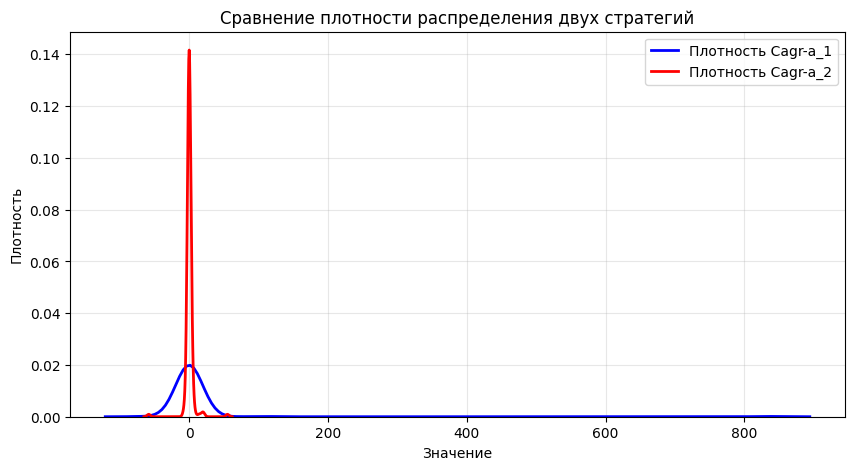

In [41]:
plt.figure(figsize=(10, 5))

sns.kdeplot(df_new.iloc[:, 10], color='blue', linewidth=2, label="Плотность Cagr-а_1", bw_adjust=0.9)
sns.kdeplot(df_new.iloc[:, 12], color='red', linewidth=2, label="Плотность Cagr-а_2", bw_adjust=1)

plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.title("Сравнение плотности распределения двух стратегий")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

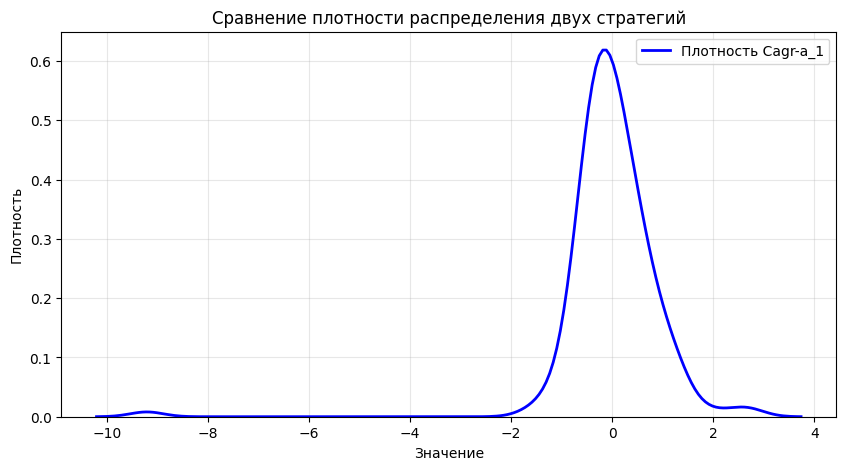

In [181]:

plt.figure(figsize=(10, 5))

sns.kdeplot((df_new.iloc[:, 2] - np.mean(df_new.iloc[:, 2]))/np.std(df_new.iloc[:, 2]), color='blue', linewidth=2, label="Плотность Cagr-а_1", bw_adjust=0.9)

plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.title("Сравнение плотности распределения двух стратегий")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

In [42]:
#для поиска наблюдений которые считаются выбросами применю Isolation Forest f

#выбираю только числовые данные 
df_numeric = df_new.select_dtypes(include=[np.number])

iso_forest = IsolationForest(
    n_estimators=100,      #кол-во деревьев в ансамбле
    max_samples='auto',    # число образцов для обучения каждого дерева
    contamination=0.2,  # доля выбросов (можно задать вручную или 'auto')
    #contamination='auto',
    random_state=42    
)

iso_forest.fit(df_numeric)

# предсказания где 1 = нормальное наблюдение, -1 = выброс
df_numeric['outlier'] = iso_forest.fit_predict(df_numeric)


In [43]:
indexes_for_correct = df_numeric[df_numeric[df_numeric.columns[-1]] ==-1].index
indexes_for_correct

Index([  0,   1,   2,   6,  11,  14,  23,  32,  33,  38,  54,  55,  57,  65,
        67,  71,  74,  78,  80,  90, 102, 112, 116, 119, 120, 130, 141, 153,
       158, 163, 167, 168, 172, 174, 178, 181, 185],
      dtype='int64')

In [44]:
#табл без nan ( для расчета процентилей и идентификации выбросов)
df_new_not_nan = df_new.dropna()

In [45]:
persent = np.percentile(df_new_not_nan.loc[:, 'CFO/Net Income'], [80, 90, 92, 94, 96, 97, 98, 99, 100])
persent

array([  2.46327176,   4.6849733 ,   8.13014753,  12.62396231,
        18.47512024,  21.52327223,  29.2806648 ,  95.31963255,
       179.86607143])

In [46]:
df_new_not_nan[df_new_not_nan['CFO/Net Income'] >40].iloc[:, [2, 3, 4] + list(range(8, df_new_not_nan.shape[1]))]

Название компании    Состояние Рейтинг УК Доходъ  CFO/Net Income  \
1     ООО "КИВИ Финанс"       Дефолт                XX          179.87   
10   Аптечная сеть 36,6  Нет дефолта               BB-           87.81   
134       ПЗ Пушкинское  Нет дефолта                 B          131.97   

        RER  Growth_income1  Growth_income2  Growth_income3  Growth_income4  \
1    -44.85           -1.00          -88.91            0.15           -1.58   
10  -128.09           -0.24           -0.46           -1.23           -0.04   
134 1729.15           -0.97           -0.86            0.32           -0.38   

       CV  ...  cfo_liabilities  profit/debt  reveneu/debt  \
1   -2.24  ...           -51.28        -0.49        296.26   
10  -2.03  ...             0.13         0.00          2.01   
134  0.86  ...             0.05         0.00          0.78   

     curr_assets_without_cash_total_liabilities  \
1                                          1.51   
10                                         0.27   
134                                        0.97   

     Working_capital-withount_current_liab_total_assets  Growth_equity1  \
1                                                 0.88            -1.11   
10                                               -0.24            -0.01   
134                                               0.48             0.02   

     Growth_equity2  Growth_equity3  Growth_equity4  FY0_total_ass  
1            -11.11            0.14            0.28          -0.02  
10             0.06           -0.03            0.17           0.00  
134            0.02            0.18            0.16           0.00  

[3 rows x 43 columns]

In [47]:
set(df_new.drop(index=indexes_for_correct[:-1])['Название компании']) - set(df_new.drop(index=indexes_for_correct[:-1]).dropna()['Название компании'])

{'Электрорешения', 'ЮниМетрикс'}

In [48]:
#индексы которые надо оставить
index_stay = df_new[df_new['Название компании'].isin(['Электрорешения', 'ЮниМетрикс'])].index
#индексы выбросов для удаления перед KNN (чтобы они не сильно влияли на результат)
index_del = list(set(indexes_for_correct) - set(index_stay))

In [49]:
#убедиться что не удалил компании где есть пропущенные 
#df_new.loc[index_del, :].isna().any(axis=1).any()
#сохраню их чтобы потом добавить
data_to_return_after_KNN = df_new.loc[index_del, :]

In [53]:
df_new.drop(index=index_del, inplace=True)

In [54]:
df_new.head(3)

id              Отрасль Название компании           Состояние  \
3  5404373487       Food & Tobacco      ООО "Кузина"  Технический дефолт   
4  7724294887            Oil & Gas       АО "Росгео"              Дефолт   
5  7725791850  Specialty Retailers      ООО "СЕЛЛЕР"  Технический дефолт   

  Рейтинг УК Доходъ   NPM   ROA   ROE  CFO/Net Income   RER  ...  \
3                XX  0.01  0.01  0.02            2.90 43.54  ...   
4                XX -0.07 -0.02 -0.04            3.94  4.16  ...   
5                XX  0.02  0.03  0.17           -9.26  5.75  ...   

   cfo_liabilities  profit/debt  reveneu/debt  \
3             0.06         0.04          3.27   
4            -0.13        -0.05          0.61   
5            -0.33         0.04          1.97   

   curr_assets_without_cash_total_liabilities  \
3                                        1.23   
4                                        0.63   
5                                        1.20   

   Working_capital-withount_current_liab_total_assets  Growth_equity1  \
3                                               0.53             0.02   
4                                               0.16            -0.06   
5                                               0.77             0.11   

   Growth_equity2  Growth_equity3  Growth_equity4  FY0_total_ass  
3            0.02           -0.00            0.13           0.01  
4            0.06            0.16            0.04          -0.02  
5            0.70            0.43            0.18           0.03  

[3 rows x 48 columns]

In [402]:
#df_new[np.isclose(df_new['ROE'], 6.02197486, atol=1e-3)]
#df_new.drop(index=[158],inplace=True)

#df_new.to_excel(r'C:\Desktop\risk\data_without_outline.xlsx')

In [55]:
#алгоритм заполнения nan значений методом  KNN

# Удаляем строковые столбцы, так как они мешают расчетам
df_numeric = df_new.select_dtypes(include=[np.number])
df_numeric = df_numeric.iloc[:, 1:]

# Пока в DataFrame есть NaN, продолжаем замену
while df_numeric.isna().any().any():
    nan_columns = df_numeric.columns[df_numeric.isna().any()]  # Определяем столбцы с NaN

    # Проходим по всем строкам, где есть NaN
    for index, row in df_numeric.iterrows():
        if row.isnull().any():  # Если в строке есть хотя бы один NaN
            for col in nan_columns:
                if pd.isnull(row[col]):  # Если конкретное значение в строке NaN
                    # Исключаем этот столбец из расчетов
                    df_without_nan_col = df_numeric.drop(columns=[col]).dropna()

                    # Преобразуем текущую строку в DataFrame и исключаем NaN-столбец
                    row_numeric = row.drop(labels=[col]).to_frame().T.dropna(axis=1)

                    # Найти общие числовые столбцы, чтобы избежать разной размерности
                    common_columns = df_without_nan_col.columns.intersection(row_numeric.columns)

                    # Оставляем только эти столбцы
                    df_without_nan_col = df_without_nan_col[common_columns]
                    row_numeric = row_numeric[common_columns]

                    # Проверяем, что остались числовые данные
                    if not df_without_nan_col.empty and not row_numeric.empty:
                        # Рассчитываем Евклидово расстояние от текущей строки до всех остальных
                        distances = euclidean_distances(
                            df_without_nan_col.values,  # Данные без NaN и строковых значений
                            row_numeric.values  # Текущая строка без NaN-столбца
                        ).flatten()

                        # Получаем индексы 5 ближайших соседей
                        nearest_neighbors_idx = np.argsort(distances)[:5]

                        # Вычисляем среднее значение по 5 ближайшим соседям для столбца с NaN
                        mean_value = df_numeric.iloc[nearest_neighbors_idx][col].mean()

                        # Заполняем NaN этим средним значением
                        df_numeric.at[index, col] = mean_value

# Обновляем числовые столбцы в оригинальном DataFrame
df_new[df_numeric.columns] = df_numeric








In [56]:
#возвращаю удаленные выбросы

df_new = pd.concat([df_new, data_to_return_after_KNN[data_to_return_after_KNN['Состояние'].isin(['Дефолт', 'Технический дефолт'])]], ignore_index=True)


In [57]:
df_new.value_counts('Состояние')

Состояние
Нет дефолта           140
Технический дефолт     10
Дефолт                  5
Name: count, dtype: int64

In [58]:
df_rating = df_new.iloc[list(set(df_new.index) - set(df_new[df_new['Рейтинг УК Доходъ']== 'XX'].index)), 5:].reset_index()
df_rating

index   NPM   ROA   ROE  CFO/Net Income     RER  Growth_income1  \
0        3  0.16  0.08  0.15            1.05    6.44           -0.18   
1        4 -0.23 -0.06 -0.25            0.37   -3.94            3.62   
2        5  0.21  0.11  0.16            0.99    5.91           -0.22   
3        6  0.00  0.00 -0.01           87.81 -128.09           -0.24   
4        7  0.36  0.07  0.11            1.10    9.49           -0.09   
..     ...   ...   ...   ...             ...     ...             ...   
143    146  0.02  0.01  0.03            0.00   25.55            2.59   
144    147  0.10  0.08  0.30           -0.53    3.29            0.03   
145    148  0.04  0.05  0.31           -5.55    3.18           -0.22   
146    149  0.05  0.10  1.55           -3.60    0.64            0.39   
147    154 16.94 -0.83 -4.29           -0.18   -0.21            0.49   

     Growth_income2  Growth_income3  Growth_income4  ...  cfo_liabilities  \
0             -0.59            0.50            5.84  ...             0.17   
1             -1.35            1.64           -0.18  ...            -0.03   
2             -0.15            0.10            1.83  ...             0.34   
3             -0.46           -1.23           -0.04  ...             0.13   
4             -0.25            0.16            1.95  ...             0.23   
..              ...             ...             ...  ...              ...   
143           -0.94            1.48            2.00  ...             0.00   
144            0.02            0.24           -0.15  ...            -0.06   
145            1.34            1.88           -0.16  ...            -0.36   
146           19.26           -0.91           -0.12  ...            -0.37   
147          -37.85           -0.88            0.82  ...             0.18   

     profit/debt  reveneu/debt  curr_assets_without_cash_total_liabilities  \
0           0.39          2.39                                        0.47   
1          -0.30          1.30                                        0.79   
2           0.59          2.78                                        1.36   
3           0.00          2.01                                        0.27   
4           0.22          0.62                                        1.13   
..           ...           ...                                         ...   
143         0.01          0.69                                        0.63   
144         0.14          1.48                                        0.75   
145         0.07          1.67                                        1.08   
146         0.10          0.00                                        1.06   
147        -1.51         -0.09                                        1.01   

     Working_capital-withount_current_liab_total_assets  Growth_equity1  \
0                                                 0.04            -0.14   
1                                                 0.13            -0.14   
2                                                 0.33             0.06   
3                                                -0.24            -0.01   
4                                                 0.11             0.09   
..                                                 ...              ...   
143                                               0.25             0.03   
144                                               0.44             0.03   
145                                               0.25             0.03   
146                                               0.84            -0.19   
147                                               0.55            -0.59   

     Growth_equity2  Growth_equity3  Growth_equity4  FY0_total_ass  
0              0.18            0.71            0.66           0.08  
1             -0.05            0.14            0.30          -0.06  
2              0.18            0.44           -0.16           0.11  
3              0.06           -0.03            0.17           0.00  
4              0.37            0

In [59]:
# таблица соответствия рейтингов и числовых значений
rating_to_value = {
    "AAA": 10, "AA": 9, "A": 8, "BBB": 7, "BB": 6, "BB-": 5,
    "B+": 4, "B": 3, "CCC": 2, "C": 1, "D": 0
}

#обраимый словарь рейтингов
value_to_rating = {v: k for k, v in rating_to_value.items()}

for i in df_new[df_new['Рейтинг УК Доходъ']== 'XX'].index:
    distances = euclidean_distances(df_rating.iloc[:, 1:].values, df_new.iloc[i, 5:].values.reshape(1, -1))
    local_ratings = df_new.iloc[df_rating.loc[np.argsort(distances.flatten())[:10], :]['index'].values, 4].values
    # преобразую  рейтинги в числа и вычисляю среднее
    numeric_ratings = [rating_to_value[r] for r in local_ratings]
    mean_value = np.mean(numeric_ratings)

    # округяляю до ближайшего рейтинга
    closest_value = min(value_to_rating.keys(), key=lambda x: abs(x - mean_value))

    # опреедлю средний буквенный рейтинг
    average_rating = value_to_rating[closest_value]
    df_new.iloc[i, 4] = average_rating
    

In [60]:
#предположим что тех дефолт равносилен дефолту
df_new.loc[df_new['Состояние'] == 'Технический дефолт', 'Состояние'] = 'Дефолт'


In [61]:
df_new.head()

id              Отрасль   Название компании    Состояние  \
0  5404373487       Food & Tobacco        ООО "Кузина"       Дефолт   
1  7724294887            Oil & Gas         АО "Росгео"       Дефолт   
2  7725791850  Specialty Retailers        ООО "СЕЛЛЕР"       Дефолт   
3  5321029508            Chemicals               Акрон  Нет дефолта   
4  6445005149       Food & Tobacco  "Агрофирма "Рубеж"  Нет дефолта   

  Рейтинг УК Доходъ   NPM   ROA   ROE  CFO/Net Income   RER  ...  \
0                 B  0.01  0.01  0.02            2.90 43.54  ...   
1                BB -0.07 -0.02 -0.04            3.94  4.16  ...   
2                B+  0.02  0.03  0.17           -9.26  5.75  ...   
3                 A  0.16  0.08  0.15            1.05  6.44  ...   
4                 B -0.23 -0.06 -0.25            0.37 -3.94  ...   

   cfo_liabilities  profit/debt  reveneu/debt  \
0             0.06         0.04          3.27   
1            -0.13        -0.05          0.61   
2            -0.33         0.04          1.97   
3             0.17         0.39          2.39   
4            -0.03        -0.30          1.30   

   curr_assets_without_cash_total_liabilities  \
0                                        1.23   
1                                        0.63   
2                                        1.20   
3                                        0.47   
4                                        0.79   

   Working_capital-withount_current_liab_total_assets  Growth_equity1  \
0                                               0.53             0.02   
1                                               0.16            -0.06   
2                                               0.77             0.11   
3                                               0.04            -0.14   
4                                               0.13            -0.14   

   Growth_equity2  Growth_equity3  Growth_equity4  FY0_total_ass  
0            0.02           -0.00            0.13           0.01  
1            0.06            0.16            0.04          -0.02  
2            0.70            0.43            0.18           0.03  
3            0.18            0.71            0.66           0.08  
4           -0.05            0.14            0.30          -0.06  

[5 rows x 48 columns]

In [62]:
df_new = pd.get_dummies(df_new, columns=df_new.columns[[1, 4]])


In [63]:
df_new.drop(columns=df_new.columns[[0 ]], inplace=True) #тут еще столбец 1 удалял

In [64]:
df_new = df_new.drop_duplicates()

In [350]:
#df_new.to_excel(r'C:\Desktop\risk\data_with_outline.xlsx')

In [65]:
#df_new = pd.read_excel(r'C:\Desktop\risk\data_without_outline.xlsx')
#df_new = df_new.iloc[:, 1:]
#one hot целевой переменной
df_new['Состояние'] = df_new['Состояние'].apply(lambda x: 1 if x == 'Дефолт' else 0)

df_new.drop_duplicates(inplace=True)

In [353]:
#df_new.reset_index().drop(columns=['index'], inplace=True)

In [66]:
#ИДЕЯ СЛЕДУЮЩАЯ, для компаний чьи рейтинги очень низкие ( но без метки дефолт) присвоить им данную метку но сначала проверим через knn
#насколько они близки к дефолтным точкам, так для каждой не дофолтной точки рассчитаю расстояние для каждой n точки
#после посчитаю кол во вхождений дефолтных и недефолтных

#df_new.iloc[:, 1:43] = pd.DataFrame(MinMaxScaler(feature_range = (0, 1)).fit_transform(df_new.iloc[:, 1:43]))

#df_new.iloc[:, :43] = pd.DataFrame(StandardScaler().fit_transform(df_new.iloc[:, :43]))


In [67]:
df_new

Название компании  Состояние   NPM   ROA  \
0                                         ООО "Кузина"          1  0.01  0.01   
1                                          АО "Росгео"          1 -0.07 -0.02   
2                                         ООО "СЕЛЛЕР"          1  0.02  0.03   
3                                                Акрон          0  0.16  0.08   
4                                   "Агрофирма "Рубеж"          0 -0.23 -0.06   
..                                                 ...        ...   ...   ...   
150                           АО "О1 Пропертиз Финанс"          1  0.00  0.00   
151                                  ООО "КИВИ Финанс"          1 -0.00 -0.02   
152                             ООО "Ситиматик - Югра"          1 -0.32 -0.07   
153  НЕПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "ФИНАНСОВЫЕ С...          1  0.07  0.01   
154                                            Феррони          1 16.94 -0.83   

      ROE  CFO/Net Income    RER  Growth_income1  Growth_income2  \
0    0.02            2.90  43.54            0.35           -0.41   
1   -0.04            3.94   4.16           -4.32            0.05   
2    0.17           -9.26   5.75           -0.53            1.34   
3    0.15            1.05   6.44           -0.18           -0.59   
4   -0.25            0.37  -3.94            3.62           -1.35   
..    ...             ...    ...             ...             ...   
150  0.05           -0.02  18.08           -0.66            2.88   
151 -0.02          179.87 -44.85           -1.00          -88.91   
152  0.95           -1.41   1.05            0.60           -0.05   
153  0.15           21.94   1.21            1.81           -0.88   
154 -4.29           -0.18  -0.21            0.49          -37.85   

     Growth_income3  ...  Рейтинг УК Доходъ_A  Рейтинг УК Доходъ_AA  \
0             -0.75  ...                False                 False   
1             -0.37  ...                False                 False   
2              1.88  ...                False                 False   
3              0.50  ...                 True                 False   
4              1.64  ...                False                 False   
..              ...  ...                  ...                   ...   
150           -0.32  ...                False                 False   
151            0.15  ...                False                 False   
152           55.36  ...                False                 False   
153            1.25  ...                False                 False   
154           -0.88  ...                False                 False   

     Рейтинг УК Доходъ_B  Рейтинг УК Доходъ_B+  Рейтинг УК Доходъ_BB  \
0                   True                 False                 False   
1                  False                 False                  True   
2                  False                  True                 False   
3                  False                 False                 False   
4                   True                 False                 False   
..                   ...                   ...                   ...   
150                False                  True                 False   
151                False                 False                 False   
152                False                  True                 False   
153                 True                 False                 False   
154                False                 False                 False   

     Рейтинг УК Доходъ_BB-  Рейтинг УК Доходъ_BBB  Рейтинг УК Доходъ_C  \
0                    False                  False                False   
1                    False                  False                False   
2                    False                  False                False   
3                    False                  False                False   
4                    False                  False                False   
..                     ...                    ...                  ...   
150        

In [68]:
#точки для которыз буду считать расстояние для всех остальных точек
index_related_comp = df_new[(df_new[df_new.columns[-4:]] == 1).any(axis=1) & (df_new['Состояние'] !=1)].index

In [69]:
index_related_comp

Index([  8,  12,  15,  30,  31,  36,  37,  52,  58,  60,  69,  73,  74,  85,
        89,  91,  92,  95, 105, 113, 114, 117, 123, 126, 143],
      dtype='int64')

In [70]:
dist_df = pd.DataFrame(euclidean_distances(df_new.iloc[:, 2:43].values)) #вместо 2 - 1 

In [71]:
for i in index_related_comp:
    #беру индексы значений которые находятся ближе всего исключая само наблюдаемосе значение 
    closes_indexes_values = df_new.iloc[dist_df.iloc[i, :].sort_values()[1:17].index, 0].value_counts()
    try:
        if closes_indexes_values[1] > 1: #or closes_indexes_values[1] == 1: #если рядом стоящие сосдеи = дефолт хотя бы 1 то присваниваю наблюдению данную метку
            df_new.iloc[i, 0] = 1  
    except:
        print("Дефолтов рядом нет, поищи в другом месте")
        
    

In [72]:
df_new['Состояние'].value_counts()

Состояние
0    139
1     15
Name: count, dtype: int64

In [74]:
df_new.reset_index().drop(columns=['index'], inplace=True)

In [330]:
#df_new.drop(index=index_del, inplace=True)

In [ ]:
#feature_names[indices][:24]

In [108]:
df_new

Название компании  Состояние   NPM   ROA  \
0                                         ООО "Кузина"          1  0.01  0.01   
1                                          АО "Росгео"          1 -0.07 -0.02   
2                                         ООО "СЕЛЛЕР"          1  0.02  0.03   
3                                                Акрон          0  0.16  0.08   
4                                   "Агрофирма "Рубеж"          0 -0.23 -0.06   
..                                                 ...        ...   ...   ...   
150                           АО "О1 Пропертиз Финанс"          1  0.00  0.00   
151                                  ООО "КИВИ Финанс"          1 -0.00 -0.02   
152                             ООО "Ситиматик - Югра"          1 -0.32 -0.07   
153  НЕПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "ФИНАНСОВЫЕ С...          1  0.07  0.01   
154                                            Феррони          1 16.94 -0.83   

      ROE  CFO/Net Income    RER  Growth_income1  Growth_income2  \
0    0.02            2.90  43.54            0.35           -0.41   
1   -0.04            3.94   4.16           -4.32            0.05   
2    0.17           -9.26   5.75           -0.53            1.34   
3    0.15            1.05   6.44           -0.18           -0.59   
4   -0.25            0.37  -3.94            3.62           -1.35   
..    ...             ...    ...             ...             ...   
150  0.05           -0.02  18.08           -0.66            2.88   
151 -0.02          179.87 -44.85           -1.00          -88.91   
152  0.95           -1.41   1.05            0.60           -0.05   
153  0.15           21.94   1.21            1.81           -0.88   
154 -4.29           -0.18  -0.21            0.49          -37.85   

     Growth_income3  ...  Рейтинг УК Доходъ_A  Рейтинг УК Доходъ_AA  \
0             -0.75  ...                False                 False   
1             -0.37  ...                False                 False   
2              1.88  ...                False                 False   
3              0.50  ...                 True                 False   
4              1.64  ...                False                 False   
..              ...  ...                  ...                   ...   
150           -0.32  ...                False                 False   
151            0.15  ...                False                 False   
152           55.36  ...                False                 False   
153            1.25  ...                False                 False   
154           -0.88  ...                False                 False   

     Рейтинг УК Доходъ_B  Рейтинг УК Доходъ_B+  Рейтинг УК Доходъ_BB  \
0                   True                 False                 False   
1                  False                 False                  True   
2                  False                  True                 False   
3                  False                 False                 False   
4                   True                 False                 False   
..                   ...                   ...                   ...   
150                False                  True                 False   
151                False                 False                 False   
152                False                  True                 False   
153                 True                 False                 False   
154                False                 False                 False   

     Рейтинг УК Доходъ_BB-  Рейтинг УК Доходъ_BBB  Рейтинг УК Доходъ_C  \
0                    False                  False                False   
1                    False                  False                False   
2                    False                  False                False   
3                    False                  False                False   
4                    False                  False                False   
..                     ...                    ...                  ...   
150        

In [360]:
#отрасли малозначимы поэтому убираю их (сначала обучить модель потом эту ячейку)
X, y = df_new.loc[:, list(set(feature_names[indices][:43]))].copy(), df_new['Состояние'].copy() #df_new.select_dtypes(exclude=['object']).columns

In [550]:
X.columns

Index(['Growth_income4', 'Growth_equity4', 'ROA',
       'Working_capital-withount_current_liab_total_assets', 'NPM',
       'quiq_ratio', 'reveneu/debt', 'Growth_assets3',
       'Shortеrm_liability_Current_assets', 'Growth_income2', 'Growth_equity1',
       'Growth_equity3', 'Growth_income3', 'inventory_ratio',
       'receivables _ratio', 'Asset_Coverage_Ratio', 'Growth_equity2', 'ROE',
       'fin_leverage_ratio5', 'cfo_liabilities',
       'curr_assets_without_cash_total_liabilities', 'profit/debt',
       'Growth_assets2', 'Growth_assets4', 'Debt_total_equity ',
       'Growth_income1', 'fin_leverage_ratio3', 'RER', 'Growth_assets1',
       'MIN_MEAN', 'fin_leverage_ratio4', 'Debt_total_assets', 'FY0_total_ass',
       'CFO/Net Income', 'cash_ratio', 'current-liabilities_total_liabilities',
       'CV', 'cfo_debt', 'fin_leverage_ratio2', 'current_ratio',
       'NС_assets_equity', 'fin_leverage_ratio1',
       'longterm_debt_total_equity'],
      dtype='object')

# Выбор метода снижения размерности  

In [512]:
#стандартизую данные потмоу что методы чувствиетльны к масштабу признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

PCA - отлетает так как данные нелийнено связаны поэтому pca предполагает 
линейную структуру данных пытаясь найти такие ортогональные 
направления (главные компоненты)которые максимизируют дисперсию.



In [513]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

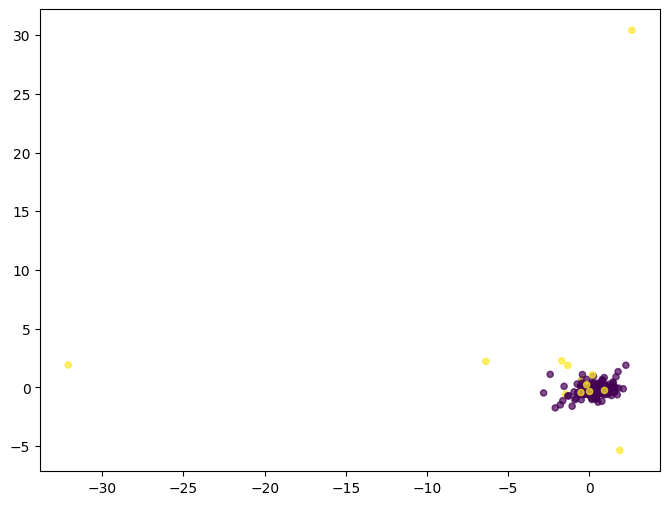

In [514]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y,                  # раскраска дял по меткам дефолта (0/1)
    cmap='viridis',       # удобная цветовая карта
    s=20,                 
    alpha=0.7
)

In [523]:
from sklearn.metrics import silhouette_score


# TSNE

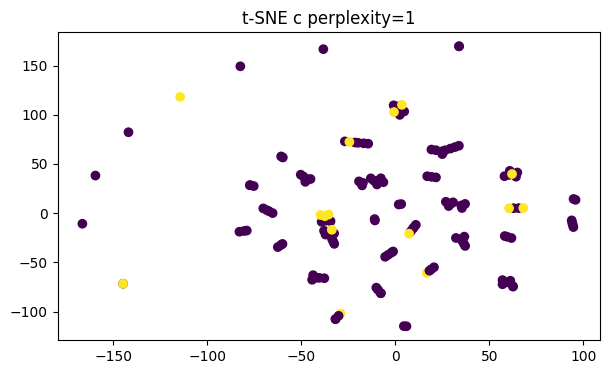

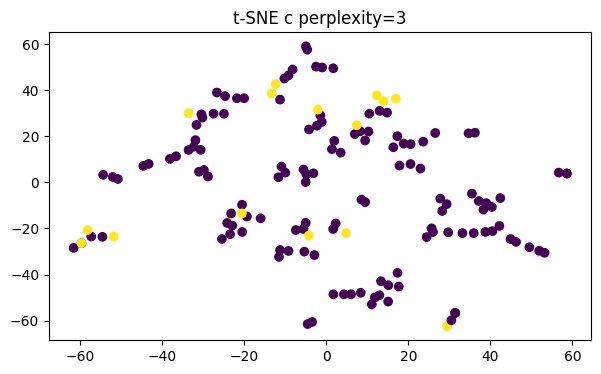

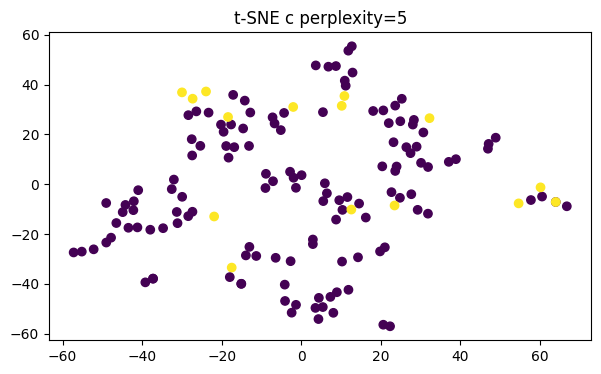

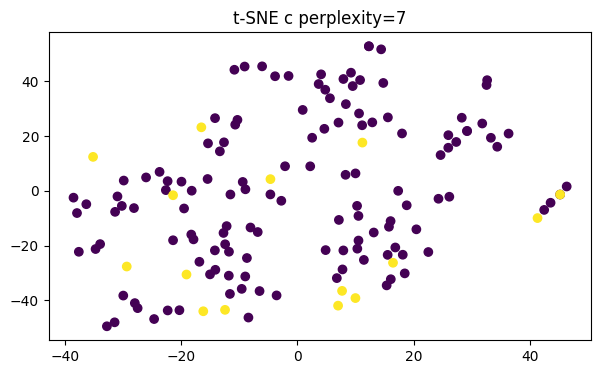

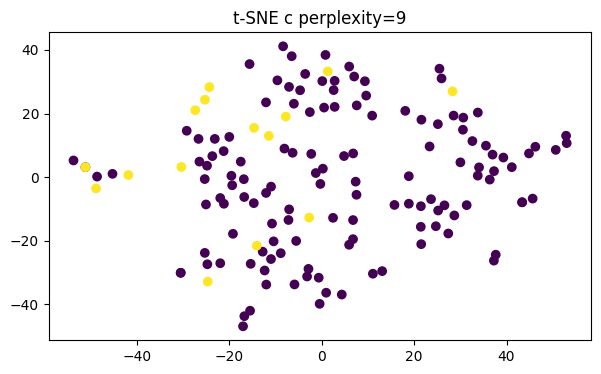

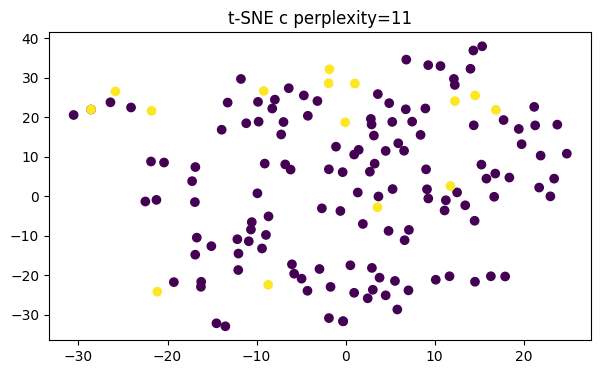

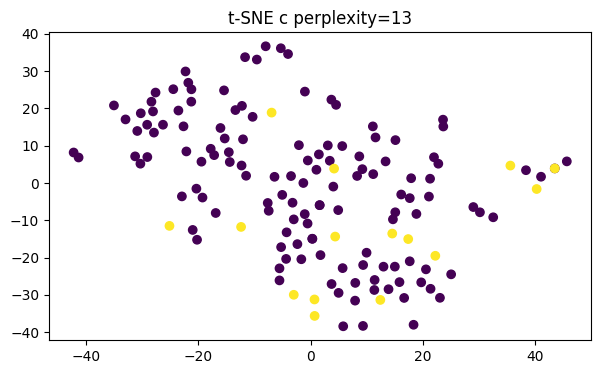

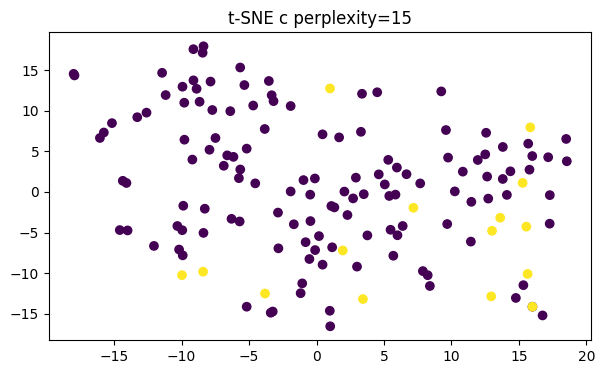

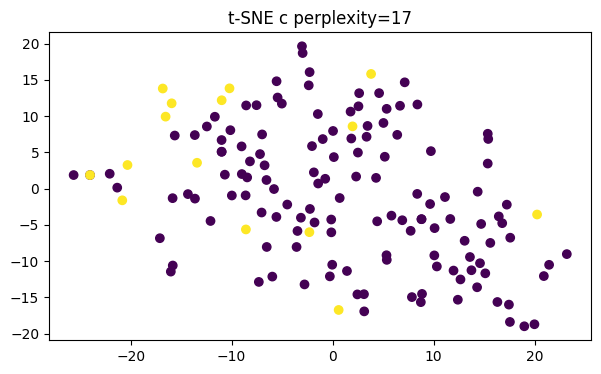

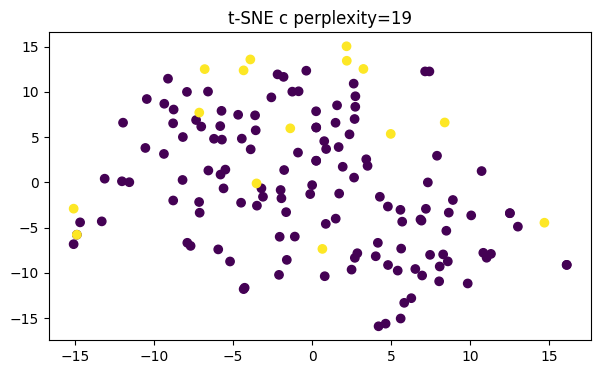

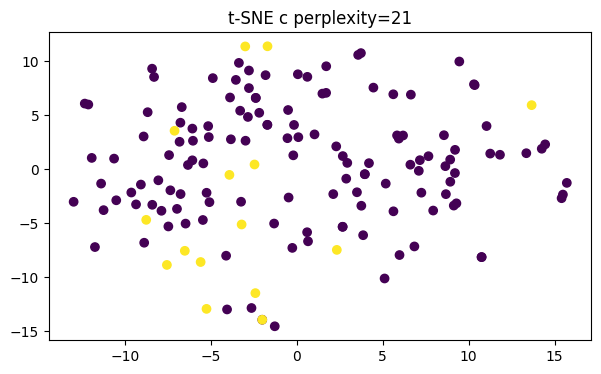

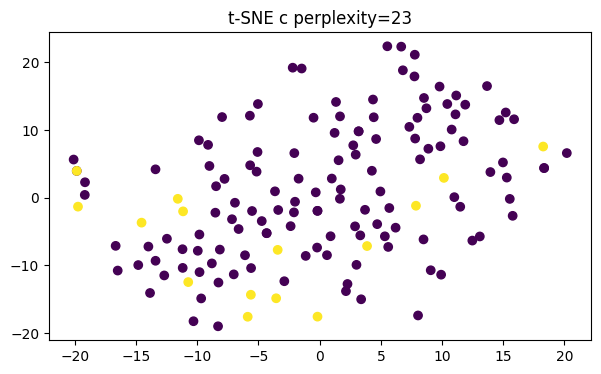

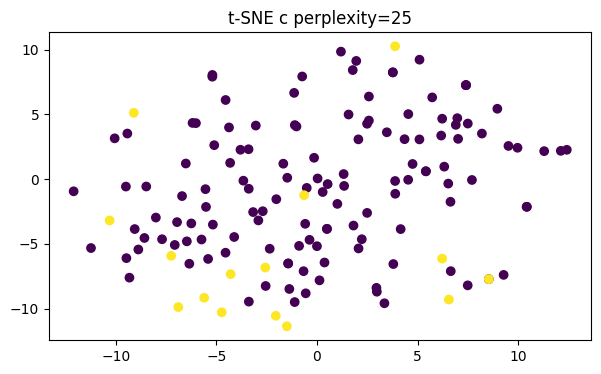

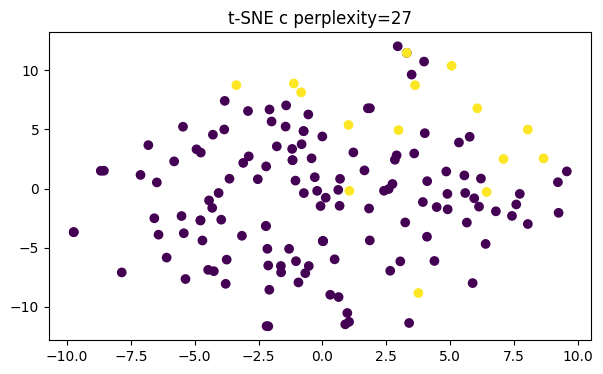

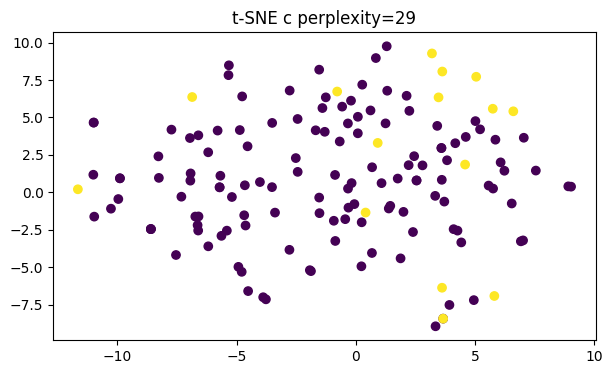

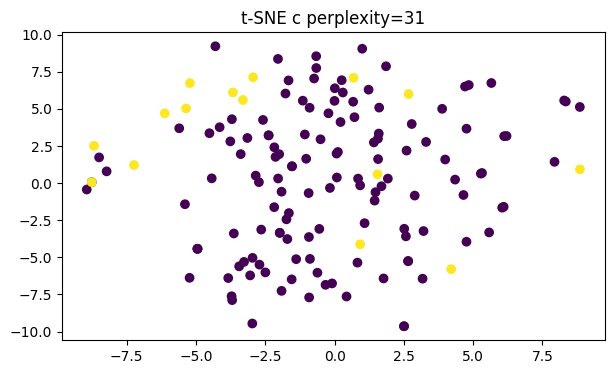

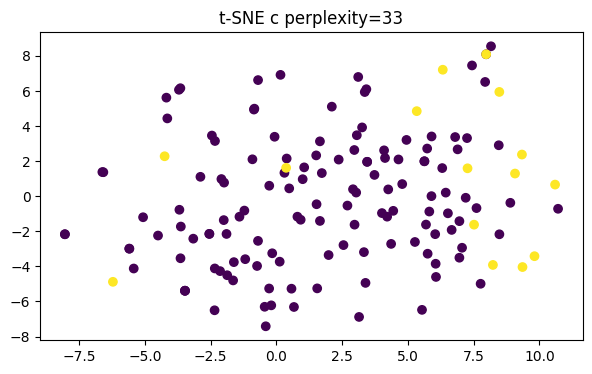

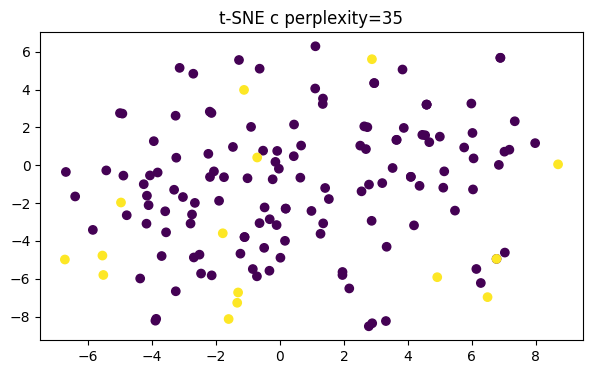

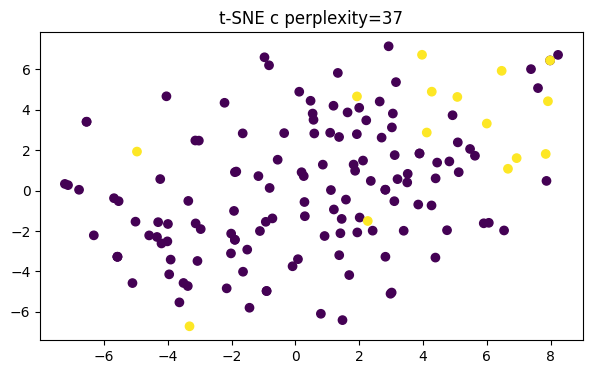

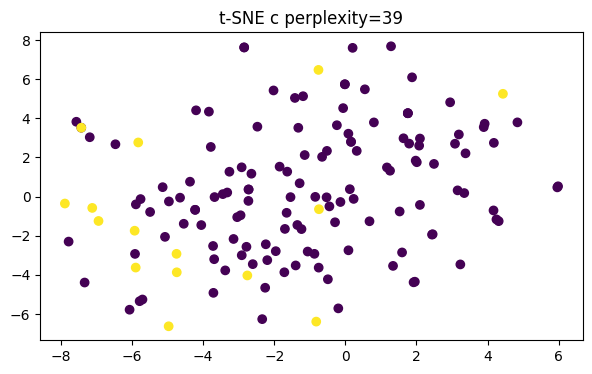

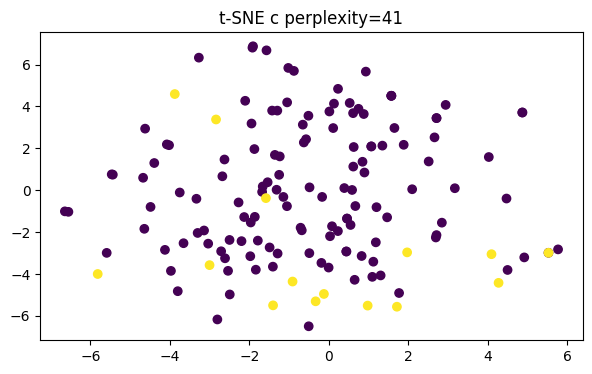

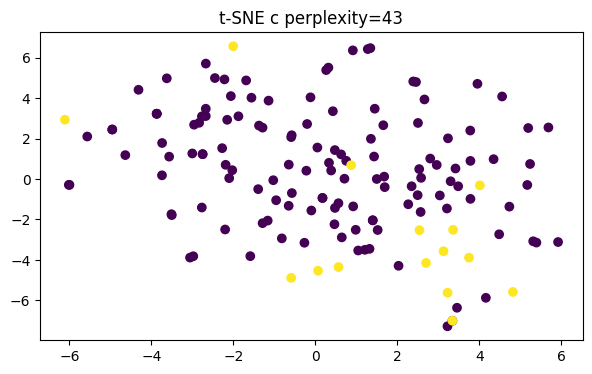

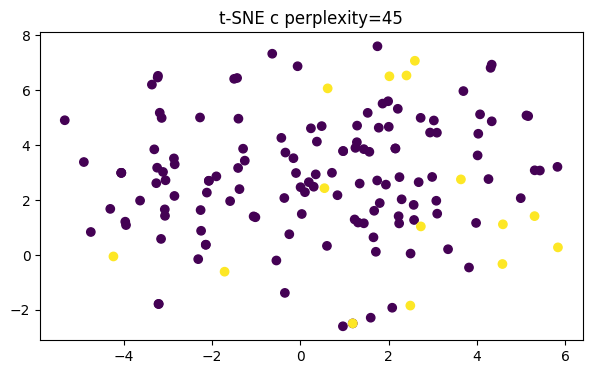

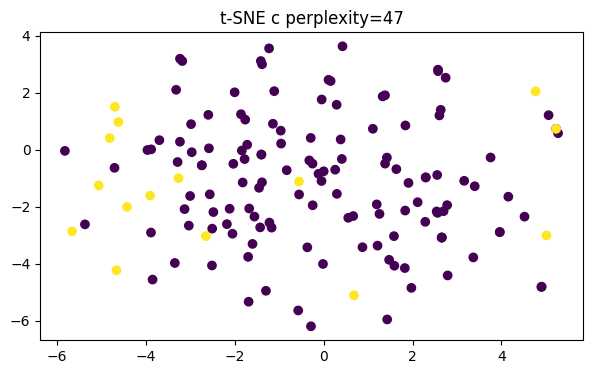

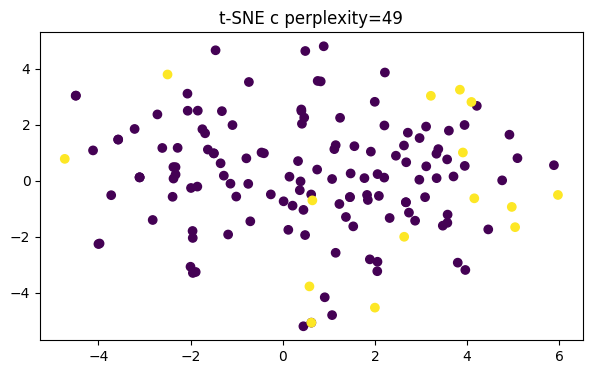

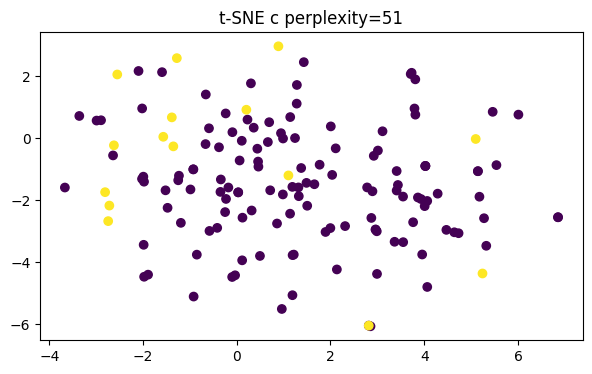

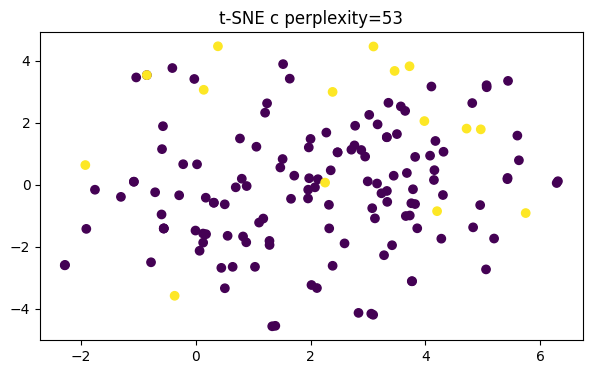

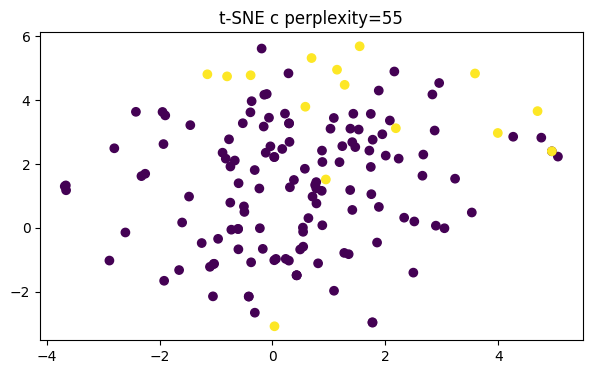

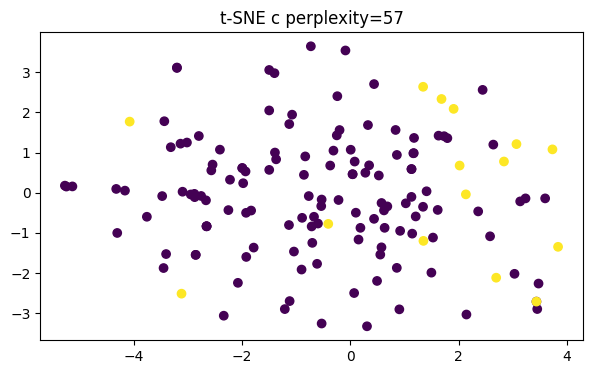

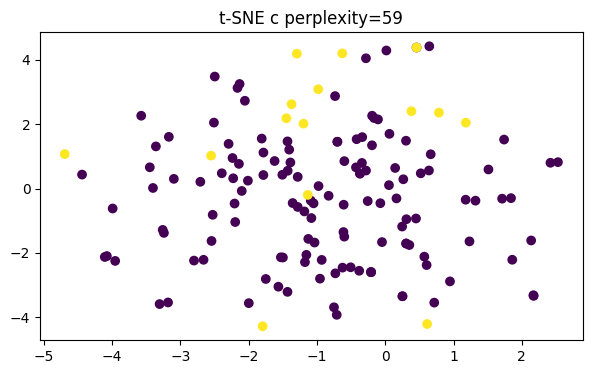

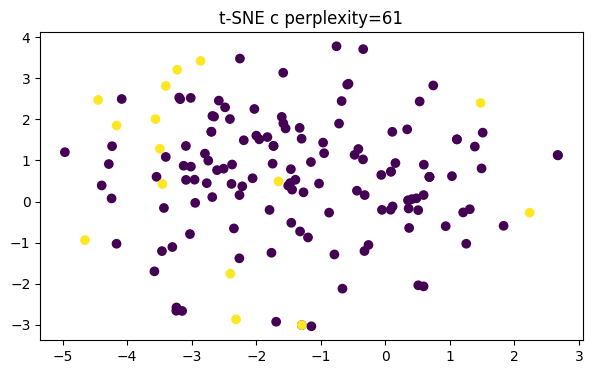

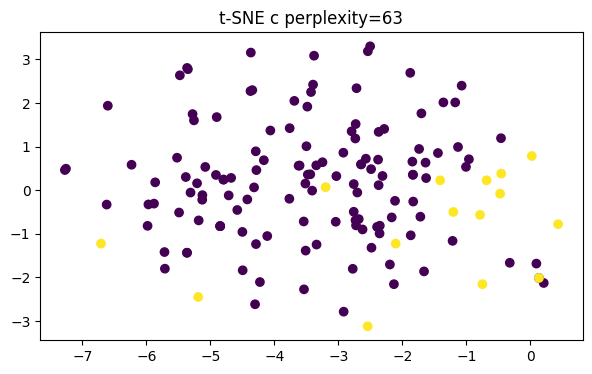

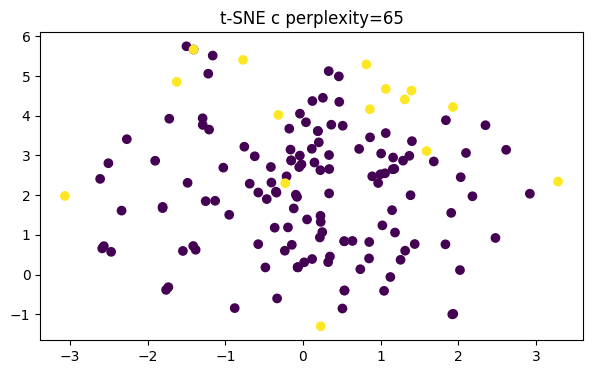

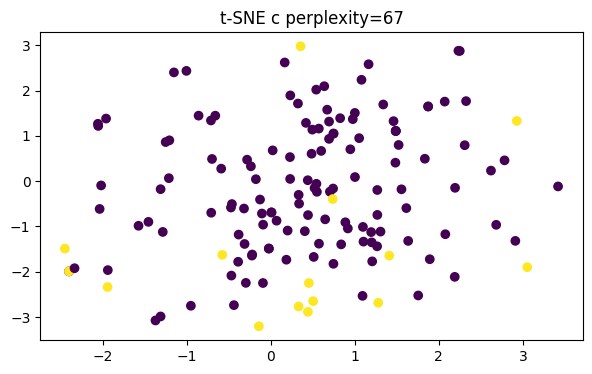

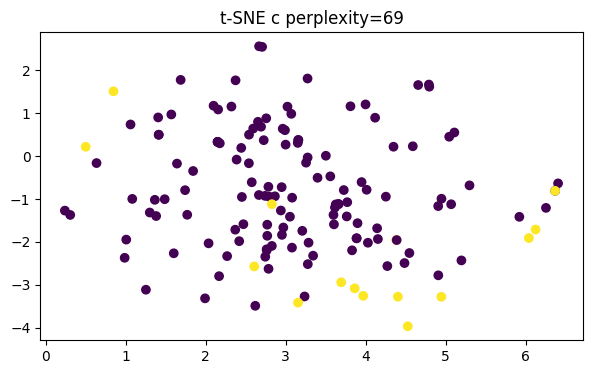

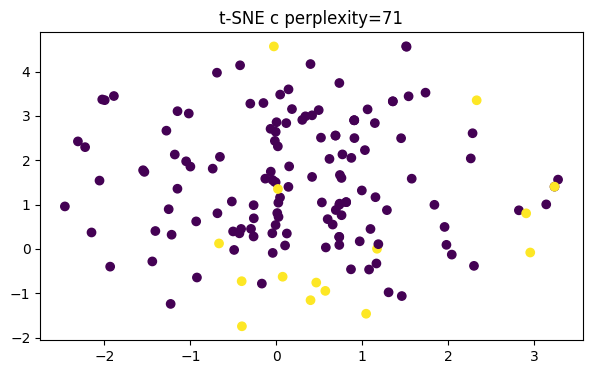

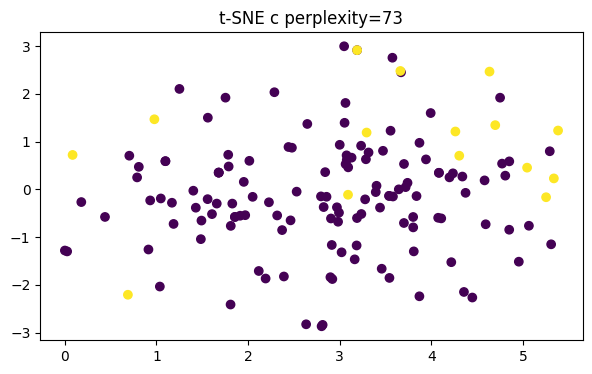

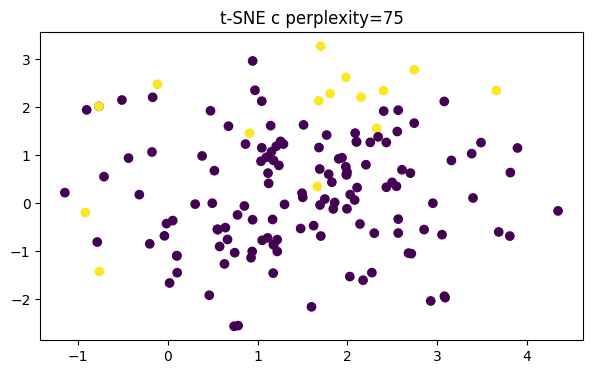

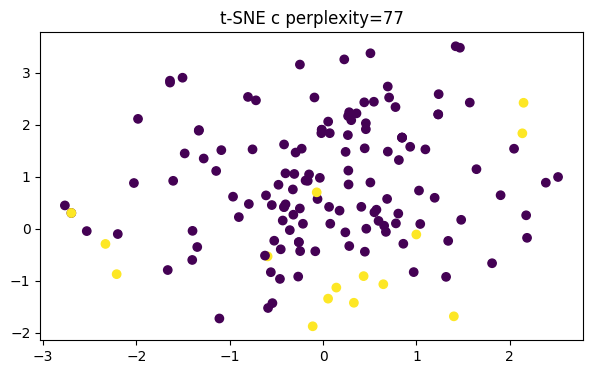

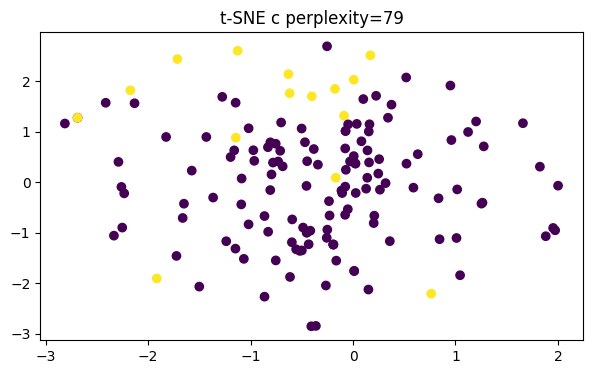

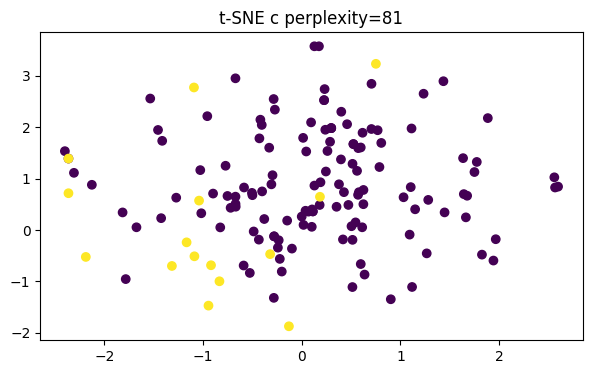

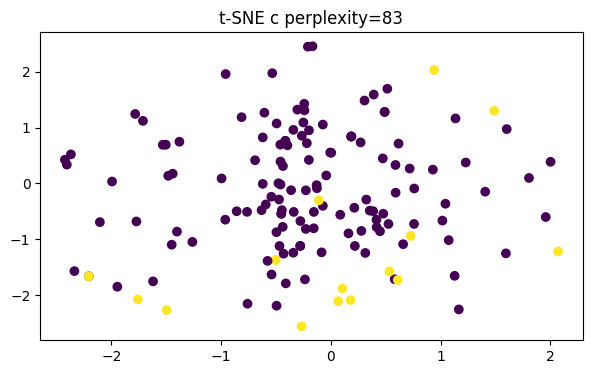

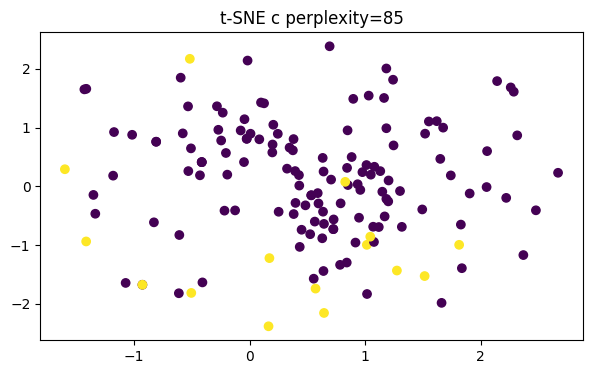

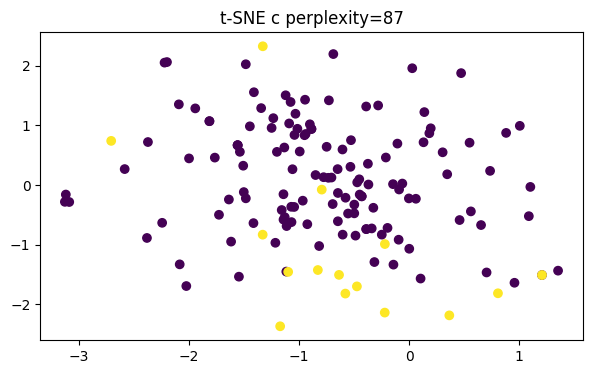

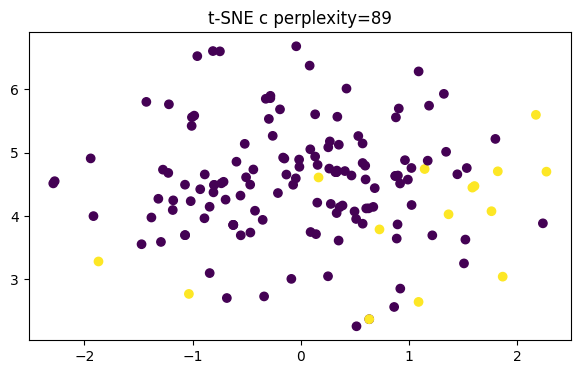

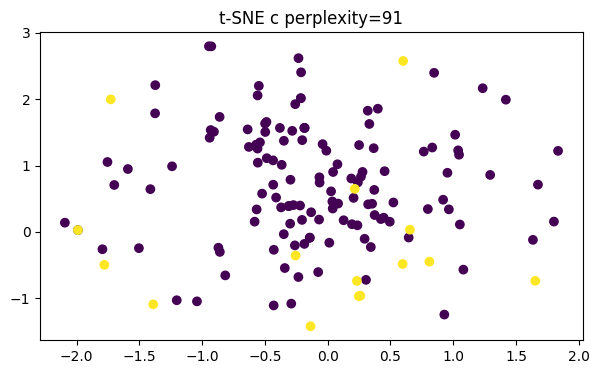

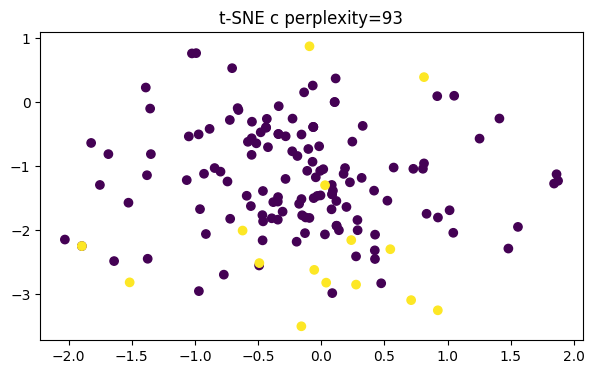

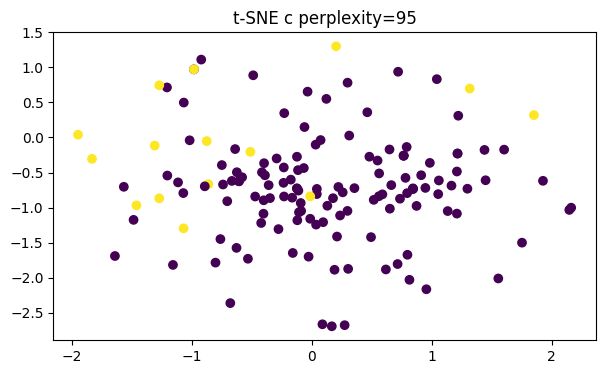

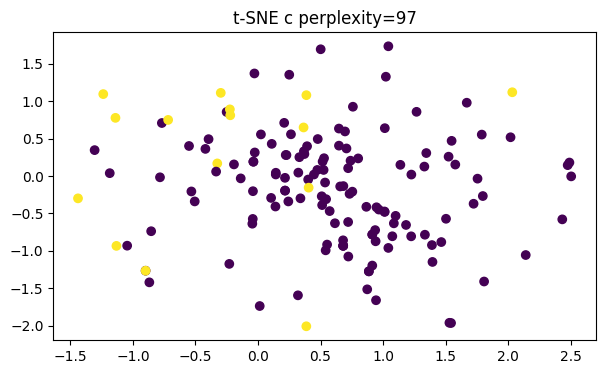

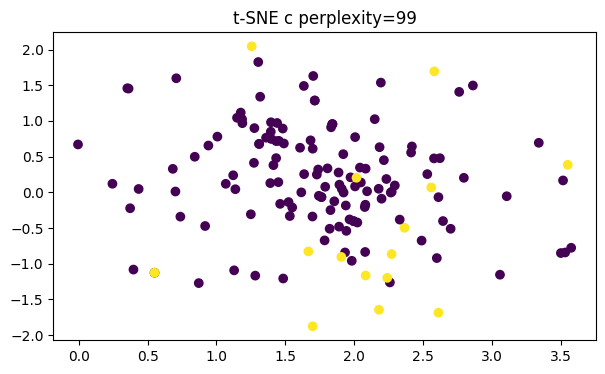

In [524]:
# использую tsne который не предполгает линейной зависимости переменных
#с разными значениями perplexity

perplexities = np.arange(1, 100, 2)
score_silhouette = []

for i in perplexities:
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    score_local = silhouette_score(X_tsne, y)
    score_silhouette.append(score_local)
    
    plt.figure(figsize=(7, 4))  
    plt.title(f"t-SNE с perplexity={i}")
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.show()
    
score_silhouette = np.array(score_silhouette) 

In [527]:
ind_max = np.argmax(score_silhouette)

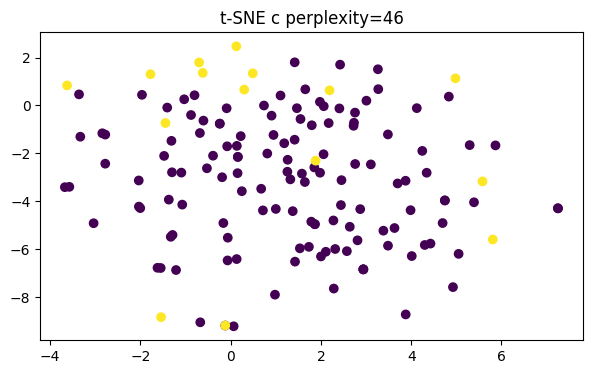

In [528]:
tsne = TSNE(n_components=2, perplexity=ind_max, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7, 4)) 
plt.title(f"t-SNE с perplexity={ind_max}")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.show()

# Подбор модели

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.64it/s]


[LightGBM] [Info] Number of positive: 15, number of negative: 139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2231
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097403 -> initscore=-2.226424
[LightGBM] [Info] Start training from score -2.226424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

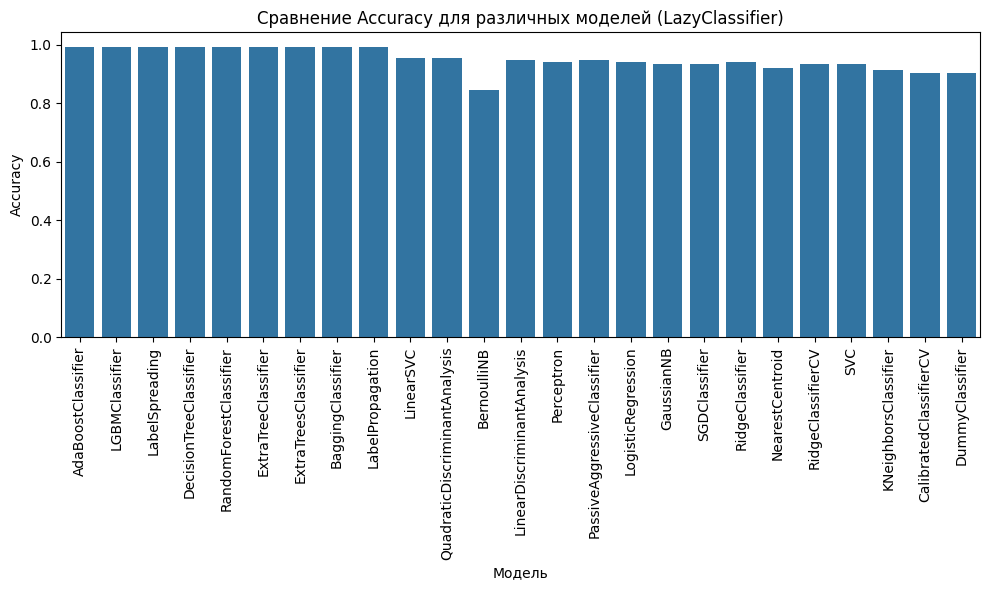

In [182]:
#подбор медели

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X, X, y, y)

print(models)

plt.figure(figsize=(10, 6))
sns.barplot(x=models.index, y="Accuracy", data=models)
plt.xticks(rotation=90)
plt.title("Сравнение Accuracy для различных моделей (LazyClassifier)")
plt.xlabel("Модель")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


# модель DecisionTreeClassifier

In [239]:
#для сбалонсированности классов
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
cw = dict(enumerate(class_weights))

model_tree = DecisionTreeClassifier(
    criterion='entropy',            # метрика качества разбиения – информационная энтропия
    splitter='best',                # стратегия выбора порога: перебираем все признаки
    max_depth=7,                    # ограничиваем глубину дерева (глубже – сложнее модель)
    min_samples_split=5,            # для разбивки узла потребуется ≥4 объектов
    min_samples_leaf=3,             # в каждом листе должно быть ≥2 объектов
    min_weight_fraction_leaf=0.0,   # взвешенная минимальная доля объектов в листе
    max_features='sqrt',            # при поиске порога рассматриваем √(кол-во признаков)
    random_state=52,                # фиксация «семени» для воспроизводимости
    class_weight=cw,                # передаём заранее вычисленные веса классов
    ccp_alpha=0.005                 # параметр cost‐complexity pruning: чем больше – тем сильнее обрезка
)

model_tree.fit(X_tsne, y)

DecisionTreeClassifier(ccp_alpha=0.005,
                       class_weight={0: 0.5539568345323741,
                                     1: 5.133333333333334},
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5,
                       random_state=52)

In [240]:
scores = cross_val_score(model_tree, X, y, cv=4, scoring='recall')
scores.mean()

0.25

# Модель ExtraTreesClassifier

In [234]:
clf = ExtraTreesClassifier(
    n_estimators=1000,            # число деревьев в «лесу»
    random_state=42,            # для воспроизводимости результатов
    max_depth=7,               # максимальная глубина каждого дерева
    max_features=43,             # сколько признаков смотреть при поиске сплита
    #bootstrap=True,             # использовать bootstrap-выборки для каждого дерева
    class_weight=cw             # учёт несбалансированности классов
)

# обучаем на всей выборке (необязательно, если сразу CV)
clf.fit(X, y)

# оценка recall при 4-фолдовой кросс-валидации
scores = cross_val_score(clf, X, y, cv=4, scoring='recall')
print(f"Recall: {scores.mean():.3f} (+/- {scores.std():.3f})")


Recall: 0.062 (+/- 0.108)


Решение проблемы дисбаланса классов

1)Суть в следующем, разделить данные на выборки, где количество классов примерно будет сопоставимо, а далее применить ансабль.
Разобраться как он будет обьединять результаты и делать соответствующий прогноз (условно выборка с меньшим классом будет постоянной, а с большим будет меняться 

2)сгенерировать похожие наблюдения меньшего класса 

# Подбор параметров

In [151]:
#подбираю параметры на онове бустреп выборке с недовыборкой большинства
param_grid = {
    'n_estimators': [200],  
    'criterion': ['entropy', 'gini'],  
    'max_depth': [5, 7, 10, 15],  
    'min_samples_split': [5, 7, 10],  # минимальное количество объектов для разбиения узла
    'min_samples_leaf': [3, 5, 8],  # Минимальное количество объектов в листе
    'max_features': ['log2'], 
    'bootstrap': [True], 
    'sampling_strategy':['auto'] 
}

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
brf = BalancedRandomForestClassifier(random_state=42, class_weight=dict(enumerate(class_weights)))

grid_search = GridSearchCV(
    estimator=brf,
    param_grid=param_grid,
    scoring='f1', 
    cv=4,  
    verbose=2
)
grid_search.fit(X.iloc[:, 1:], y)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1-score:", grid_search.best_score_)


Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_

[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=8, min_s

[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estima

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_e

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, sampling_strategy=auto; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_es

# Модель BalancedRandomForestClassifier

--Precision (Точность – позитивный предсказательный рейтинг) 

Показывает, долю истинно положительных прогнозов среди всех обьектов которым модель присвоила метку как положительный (TP / (TP + FP))

--Recall (Полнота – чувствительность)

Показывает долю истинно положительных прогнозов среди всех реальных положительных объектов (TP / (TP + FN))


In [510]:
# фомирую булеву маску — True, если метка НЕ в списке исключений для репортов
mask = ~df_report.index.isin(['accuracy','macro avg','weighted avg'])

In [533]:
#для сбалонсированности классов БАЗА
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

brf = BalancedRandomForestClassifier(
    n_estimators=20000,   
    criterion='entropy',            # критерий для оценки качества разбиения ('gini' или 'entropy')
    max_depth=10,              
#   min_samples_split=5,         # минимальное число наблюдений для разбиения узла
#   min_samples_leaf=5,          # Минимальное число образцов, необходимое в листовом узле
    max_features='log2',         # Количество признаков для рассмотрения при каждом разбиении (например, 'sqrt' или 'log2')
    bootstrap=True,              
    #oob_score=True,             # Оценка Out-of-Bag для оценки обобщающей способности
    random_state=42,            
    replacement=True,           # выбор с возвращением или без возвращения при формировании подвыборки
    sampling_strategy= 'auto' ,    # стратегия выборки для мажорного класса
   #class_weight= dict(enumerate(class_weights))                          # 'auto' означает, что для каждого дерева подвыборка 
                                #из большинства будет иметь размер равный количеству наблюдений минорного класса.
)


In [534]:
brf.fit(X, y)

#cross_val_score используется для оценки качества 
#модели с помощью кросс-валидации. Она автоматически разбивает 
#данные на тренировочные и тестовые части несколько раз, тренирует 
#модель и вычисляет метрику качества

#cv определяет сколько раз будут разбиты на тренировочную и тестовые
#то есть cv = k , тогда k-1 частей будет использоваться для обучения а 1 для теста
scores = cross_val_score(brf, X_tsne, y, cv=4, scoring='f1') #precision
scores.mean()

0.3261294261294261

In [ ]:
brf.fit(X_tsne, y)
scores = cross_val_score(brf, X_tsne, y, cv=4, scoring='f1') 
scores.mean()

In [536]:
y_pred_brf = brf.predict(X)
print("F1 на всём наборе:", f1_score(y, y_pred_brf))

F1 на всём наборе: 0.5769230769230769


In [427]:
#базовые признаки пока сохранюи раб
base_feature = X.columns.copy()

In [537]:
#отчет по классам 
report_dict = classification_report(y, y_pred_brf, output_dict=True)
df_report = pd.DataFrame(report_dict).T

# выбираем только нужные строки и столбцы
df_report_filtered = df_report.loc[mask, ['recall', 'precision', 'f1-score']]
df_report_filtered['Интерпретация'] = ['(не дефолт)', 'дефолты компаний']

In [538]:
df_report_filtered

recall  precision  f1-score     Интерпретация
0    0.83       1.00      0.91       (не дефолт)
1    1.00       0.41      0.58  дефолты компаний

In [ ]:
#отчет по классам TSNE
report_dict = classification_report(y, y_pred_brf, output_dict=True)
df_report = pd.DataFrame(report_dict).T

# выбираем только нужные строки и столбцы
df_report_filtered = df_report.loc[mask, ['recall', 'precision', 'f1-score']]
df_report_filtered['Интерпретация'] = ['(не дефолт)', 'дефолты компаний']

In [ ]:
df_report_filtered

Для дефолтного класса

--Recall(считает сколько из реально дефолтных компаний модель классифицировала как дефолтные) 1: То есть из всех реально дефолтных компаний модель удачно идентифицировала 100% остальные

– Precision(считает долю положительных классов из всех классифицированных положительно) 0.41: то есть из всех компаний которых модель пометика как дефолт только 41% реально обанкротились. Остальное - ложное срабатывания (FP) то есть много примеров надежных компаний которые модель идентифицровала как деофлтные :много ложных срабатываний

Для не дефолтного класса

– Recall 0.83: то есть модель верно классифицировала 83% надежных компаний но остальные 17% надежных она ошибочно записала как дефолты

– Precision 1: 100% модель правильно идентифицровала


На мой взгляд recall куда важне в задачах риск менеджмента так ка коучге перестраховаться и ошибочно исключить хорошую компанию чем включить дефолтную в порфтель НО Precision  очень низкий что может привести к излишне консервативной стратгеии и потере доходности

Проблема ложных срабатываний


# XGBoost 

In [587]:
X_xg = X.copy()

In [588]:
#отфильтровываю выжные
X_xg = X_xg[feature_names_xgb[indices_xgb][:29]]

In [589]:
# Создание модели XGBoost
xgb_model = XGBClassifier(
    n_estimators=10000,          
    max_depth=10,               
    learning_rate=0.1,           
    objective='binary:logistic',
    eval_metric='logloss',       # Метрика для оценки во время обучения
    tree_method='hist',          # Метод построения деревьев (быстрее чем точный метод)
    subsample=0.8,               # Доля выборки для обучения каждого дерева (тип то же самое что и  bootstrap)
    colsample_bytree=0.7,        # Доля признаков для построения каждого дерева
    gamma=0.1,                   # Минимальное снижение потерь для выполнения разбиения
    min_child_weight=5,          # Минимальная сумма весов в листе
#    reg_alpha=0.1,               # L1-регуляризация
#    reg_lambda=1.0,              # L2-регуляризация
    scale_pos_weight=1,          # Вес для положительного класса (полезно при несбалансированных данных)
    use_label_encoder=False,     # Отключение устаревшего LabelEncoder
    random_state=42,             # Фиксируем случайность для воспроизводимости
    verbosity=0                  # Уровень детализации вывода (0 - без вывода)
)


In [590]:
xgb_model.fit(X_xg, y);

In [541]:
y_pred_xgb = xgb_model.predict(X)
print("F1 на всём наборе:", f1_score(y, y_pred_xgb))

F1 на всём наборе: 0.47619047619047616


In [542]:
#отчет по классам
report_dict_xgb = classification_report(y, y_pred_xgb, output_dict=True)
df_report_xgb = pd.DataFrame(report_dict_xgb).T

In [543]:
df_report_filtered_xgb  = df_report_xgb.loc[mask, ['recall', 'precision', 'f1-score']]
df_report_filtered_xgb['Интерпретация'] = ['(не дефолт)', 'дефолты компаний']

In [548]:
df_report_filtered_xgb

recall  precision  f1-score     Интерпретация
0    0.99       0.93      0.96       (не дефолт)
1    0.33       0.83      0.48  дефолты компаний

# Усредненные прогнозы 

BalancedRandomForestClassifier и XGBoost

In [545]:
#получаю вероятности класса 1 и усредняю прогноз двух моеделй

proba_brf = brf.predict_proba(X)[:, 1]
proba_xgb = xgb_model.predict_proba(X)[:, 1]

# усреднейнный прогноз
avg_proba = np.mean([proba_brf, proba_xgb], axis=0)
pred_avg = np.where(avg_proba >= 0.5, 1, 0)


In [546]:
report_dict_mean = classification_report(y, pred_avg, output_dict=True)
df_report_mean = pd.DataFrame(report_dict_mean).T

df_report_filtered_mean = df_report_mean.loc[mask, ['recall', 'precision', 'f1-score']]
df_report_filtered_mean['Интерпретация'] = ['(не дефолт)', 'дефолты компаний']

In [547]:
df_report_filtered_mean

recall  precision  f1-score     Интерпретация
0    0.97       0.98      0.97       (не дефолт)
1    0.80       0.75      0.77  дефолты компаний

In [104]:
#prob_pred = brf.predict_proba(df_new[df_new['Название компании'].isin(ones_df['Название компании'])].loc[:, list(set(feature_names[indices][:15]) - set(del_col))])

# ПОДБОР ПРИЗНАКОВ

# ДЛЯ BalancedRandomForestClassifier

In [255]:
importances = brf.feature_importances_

feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

indices = np.argsort(importances)[::-1]

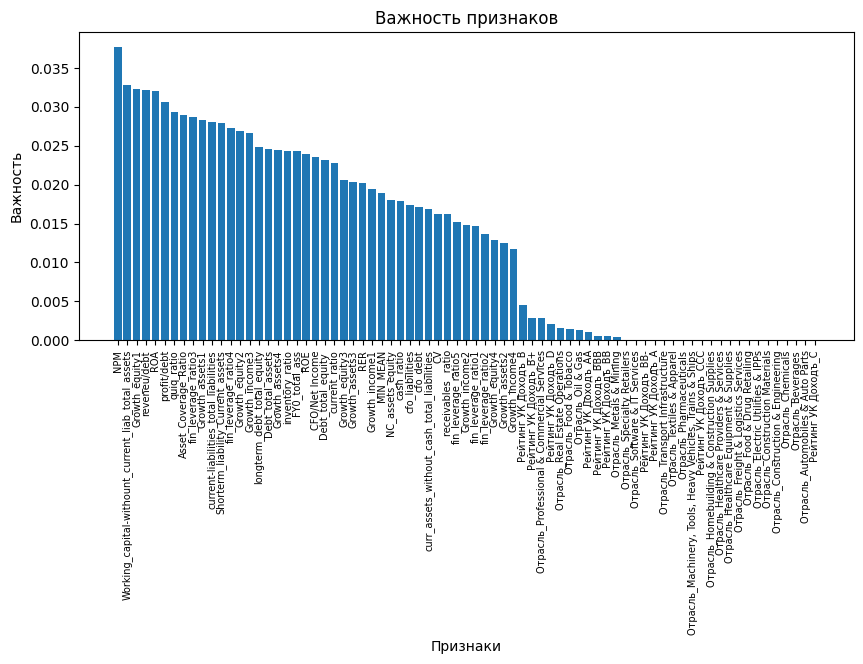

In [159]:
#картинка 1 
plt.figure(figsize=(10, 4))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(
    range(X.shape[1]), 
    feature_names[indices], 
    rotation=90,  # Уменьшенный наклон
    fontsize=7,  # Меньший размер шрифта
    fontstyle='normal'  # Обычный (не курсив)
    )
plt.xlabel("Признаки")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()

#plt.tight_layout() 


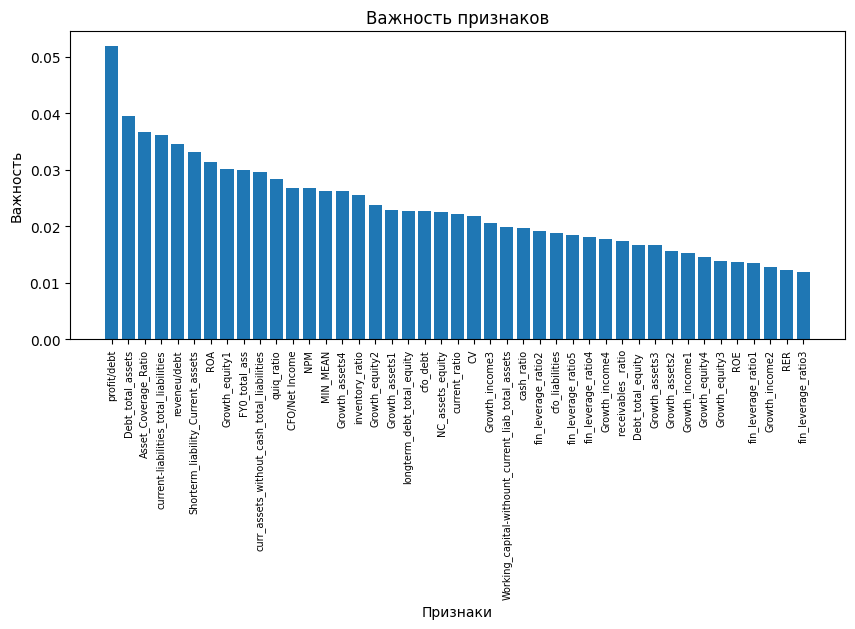

In [190]:
#картинка 2 
plt.figure(figsize=(10, 4))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(
    range(X.shape[1]), 
    feature_names[indices], 
    rotation=90,  # Уменьшенный наклон
    fontsize=7,  # Меньший размер шрифта
    fontstyle='normal'  # Обычный (не курсив)
    )
plt.xlabel("Признаки")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()

#plt.tight_layout() #это функция, которая автоматически регулирует расположение графиков и подписей, чтобы они не накладывались друг на друга


In [322]:
#del_col = ['RER', 'fin_leverage_ratio5', 'NС_assets_equity', 'CFO/Net Income']
#set(feature_names[indices][:43])

# ДЛЯ XGBoost

In [570]:
importances_xgb = xgb_model.feature_importances_
feature_names_xgb = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])
indices_xgb = np.argsort(importances_xgb)[::-1]

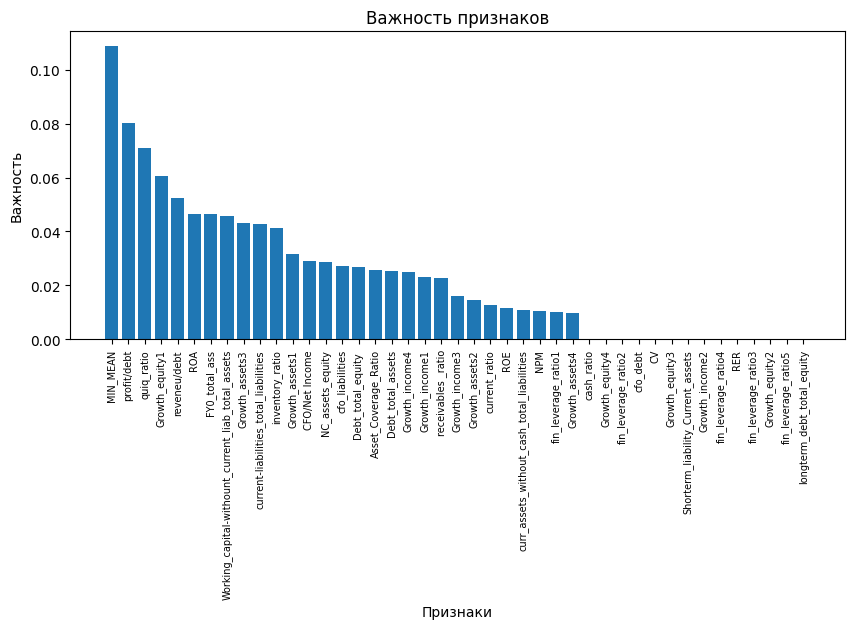

In [571]:
#картинка 1 

plt.figure(figsize=(10, 4))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb], align="center")
plt.xticks(
    range(X.shape[1]), 
    feature_names_xgb[indices_xgb], 
    rotation=90,  
    fontsize=7,  
    fontstyle='normal' 
    )
plt.xlabel("Признаки")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()

In [595]:
#df_new['Состояние_прогноз'] = y_pred

In [596]:
df_new

Название компании  Состояние   NPM   ROA  \
0                                         ООО "Кузина"          1  0.01  0.01   
1                                          АО "Росгео"          1 -0.07 -0.02   
2                                         ООО "СЕЛЛЕР"          1  0.02  0.03   
3                                                Акрон          0  0.16  0.08   
4                                   "Агрофирма "Рубеж"          0 -0.23 -0.06   
..                                                 ...        ...   ...   ...   
150                           АО "О1 Пропертиз Финанс"          1  0.00  0.00   
151                                  ООО "КИВИ Финанс"          1 -0.00 -0.02   
152                             ООО "Ситиматик - Югра"          1 -0.32 -0.07   
153  НЕПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "ФИНАНСОВЫЕ С...          1  0.07  0.01   
154                                            Феррони          1 16.94 -0.83   

      ROE  CFO/Net Income    RER  Growth_income1  Growth_income2  \
0    0.02            2.90  43.54            0.35           -0.41   
1   -0.04            3.94   4.16           -4.32            0.05   
2    0.17           -9.26   5.75           -0.53            1.34   
3    0.15            1.05   6.44           -0.18           -0.59   
4   -0.25            0.37  -3.94            3.62           -1.35   
..    ...             ...    ...             ...             ...   
150  0.05           -0.02  18.08           -0.66            2.88   
151 -0.02          179.87 -44.85           -1.00          -88.91   
152  0.95           -1.41   1.05            0.60           -0.05   
153  0.15           21.94   1.21            1.81           -0.88   
154 -4.29           -0.18  -0.21            0.49          -37.85   

     Growth_income3  ...  Рейтинг УК Доходъ_AA  Рейтинг УК Доходъ_B  \
0             -0.75  ...                 False                 True   
1             -0.37  ...                 False                False   
2              1.88  ...                 False                False   
3              0.50  ...                 False                False   
4              1.64  ...                 False                 True   
..              ...  ...                   ...                  ...   
150           -0.32  ...                 False                False   
151            0.15  ...                 False                False   
152           55.36  ...                 False                False   
153            1.25  ...                 False                 True   
154           -0.88  ...                 False                False   

     Рейтинг УК Доходъ_B+  Рейтинг УК Доходъ_BB  Рейтинг УК Доходъ_BB-  \
0                   False                 False                  False   
1                   False                  True                  False   
2                    True                 False                  False   
3                   False                 False                  False   
4                   False                 False                  False   
..                    ...                   ...                    ...   
150                  True                 False                  False   
151                 False                 False                   True   
152                  True                 False                  False   
153                 False                 False                  False   
154                 False                 False                  False   

     Рейтинг УК Доходъ_BBB  Рейтинг УК Доходъ_C  Рейтинг УК Доходъ_CCC  \
0                    False                False                  False   
1                    False                False                  False   
2                    False                False                  False   
3                    False                False                  False   
4                    False                False                  False   
..                     ...                  ...              

In [597]:
#тут я смотрю в каком классе модель больше всего ошибалась в предсказании (предсказывала дефолт тогда как кмопания стабильна)

#больше всего ошибок в классе B (10) и BB (7) значит скорее всего есть выбросы в некоторых признакаках которые путают модель

df_mistakes = df_new[((df_new['Состояние'] == 1) & (df_new['Состояние_прогноз'] == 0)) | 
       ((df_new['Состояние'] == 0) & (df_new['Состояние_прогноз'] == 1))]
df_mistakes = df_mistakes.iloc[:, [0, 1, -1] + list(np.arange(67, len(df_mistakes.columns)-1, 1))]

In [612]:
df_mistakes

Название компании  Состояние  Состояние_прогноз  \
4                       "Агрофирма "Рубеж"          0                  1   
6                       Аптечная сеть 36,6          0                  1   
16                                  Эталон          0                  1   
19                                 Россети          0                  1   
24                               ГК Пионер          0                  1   
26                           Гарант-Инвест          0                  1   
40                                 Легенда          0                  1   
45                              Мостотрест          0                  1   
51                                    Окей          0                  1   
55                           Сибирский КХП          0                  1   
56                          СофтЛайн Трейд          0                  1   
62                              Вэб-Лизинг          0                  1   
70                                Генетико          0                  1   
73                          РЕГИОН-ПРОДУКТ          0                  1   
75   Брусника. Строительство и девелопмент          0                  1   
78                         Нафтатранс плюс          0                  1   
85                                    Смак          0                  1   
88                             ПРОМОМЕД ДМ          0                  1   
89                           Росагролизинг          0                  1   
94                              Аэрофьюэлз          0                  1   
100                         Бинофарм групп          0                  1   
101                               ГК "ЕКС"          0                  1   
108                          ПЗ Пушкинское          0                  1   
113                                Реаторг          0                  1   
120                                Агротек          0                  1   
122                                 ЛИТАНА          0                  1   
126                   Истринская сыроварня          0                  1   
130                          ПЛАЗА-Телеком          0                  1   

     Рейтинг УК Доходъ_A  Рейтинг УК Доходъ_AA  Рейтинг УК Доходъ_B  \
4                  False                 False                 True   
6                  False                 False                False   
16                 False                 False                False   
19                 False                  True                False   
24                 False                 False                False   
26                 False                 False                False   
40                 False                 False                False   
45                 False                 False                 True   
51                 False                 False                False   
55                 False                 False                 True   
56                 False                 False                False   
62                 False                 False                 True   
70                 False                 False                 True   
73                 False                 False                False   
75                 False                 False                False   
78                 False                 False                 True   
85                 False                 False                False   
88                 False                 False                False   
89                 False                 False                False   
94                 False                 False                False   
100                False                 False                False   
101                False                 False                False   
108                False                 False                 True   
113                False                 False                False   
120                False                 Fals

In [600]:
value_counts_all = pd.concat({col: df_mistakes[col].value_counts() for col in df_mistakes.columns[3:]}, axis=1)

In [601]:
value_counts_all

Рейтинг УК Доходъ_A  Рейтинг УК Доходъ_AA  Рейтинг УК Доходъ_B  \
False                28.00                    27                   18   
True                   NaN                     1                   10   

       Рейтинг УК Доходъ_B+  Рейтинг УК Доходъ_BB  Рейтинг УК Доходъ_BB-  \
False                    26                    21                     25   
True                      2                     7                      3   

       Рейтинг УК Доходъ_BBB  Рейтинг УК Доходъ_C  Рейтинг УК Доходъ_CCC  \
False                     27                   26                     26   
True                       1                    2                      2   

       Рейтинг УК Доходъ_D  
False                28.00  
True                   NaN

In [609]:
#поиск выбрсоов в компаниях с рейтингом 'Рейтинг УК Доходъ_B', 'Рейтинг УК Доходъ_BB'

In [610]:
df_B_BB = df_new.iloc[df_mistakes[['Рейтинг УК Доходъ_B', 'Рейтинг УК Доходъ_BB']].index, list(np.arange(44))+[-1]]

In [335]:
df_B_BB_def = df_B_BB[~(df_B_BB['Состояние'] == df_B_BB['Состояние_прогноз'])]

In [336]:
df_id = df_1[df_1['Название компании '].isin(df_B_BB[~(df_B_BB['Состояние'] == df_B_BB['Состояние_прогноз'])]['Название компании'].values)]

In [337]:
ones_df = pd.merge(df_B_BB_def, df_id, left_on='Название компании', right_on='Название компании ')

In [340]:
ones_df[['id', 'Название компании', 'Состояние', 'Состояние_прогноз', 'Отрасль']]

id   Название компании  Состояние  Состояние_прогноз  \
0  6445005149  "Агрофирма "Рубеж"          0                  1   
1  7722266450  Аптечная сеть 36,6          0                  1   
2  7705619586              Эталон          0                  1   
3  4716016979             Россети          0                  1   
4  7728662669             Россети          0                  1   
5  7736227885      СофтЛайн Трейд          0                  1   
6  7704221591       Росагролизинг          0                  1   
7  5012000639            ГК "ЕКС"          0                  1   

                              Отрасль  
0                      Food & Tobacco  
1               Food & Drug Retailing  
2              Real Estate Operations  
3           Electric Utilities & IPPs  
4           Electric Utilities & IPPs  
5              Software & IT Services  
6  Professional & Commercial Services  
7          Construction & Engineering

# Удаление выбросов

In [343]:
procent_col = np.percentile(df_B_BB.iloc[:, 2:], np.arange(60, 100), axis=0)

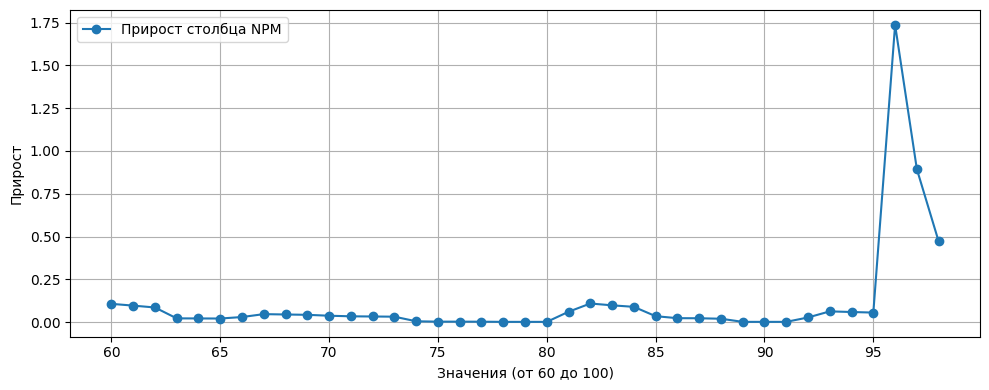

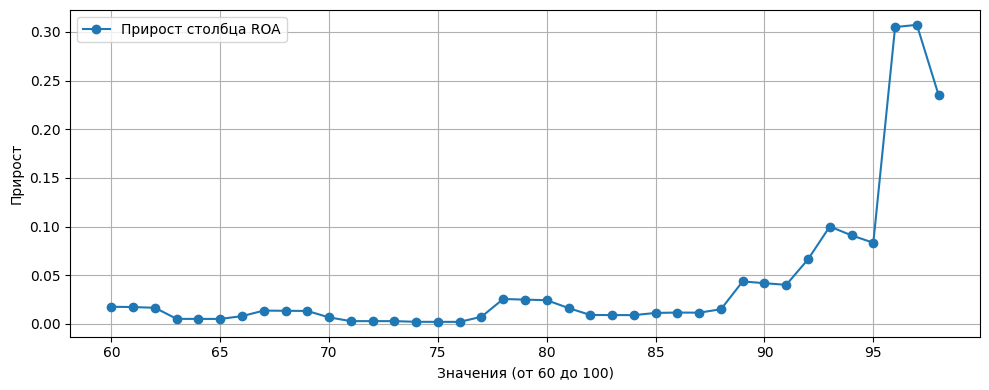

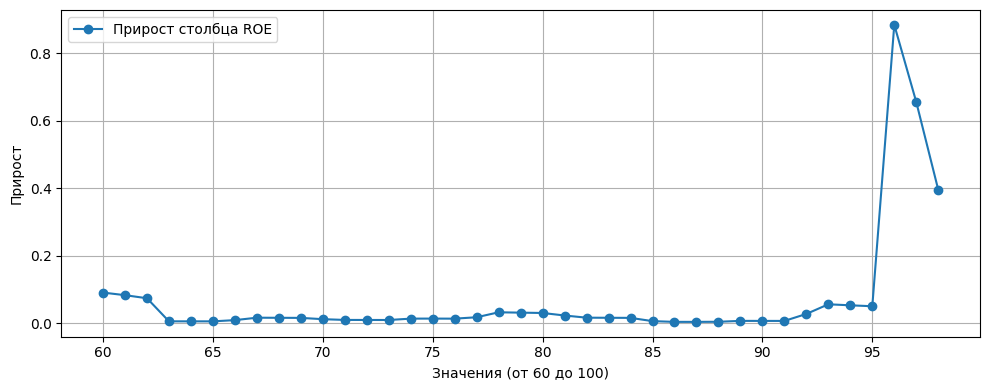

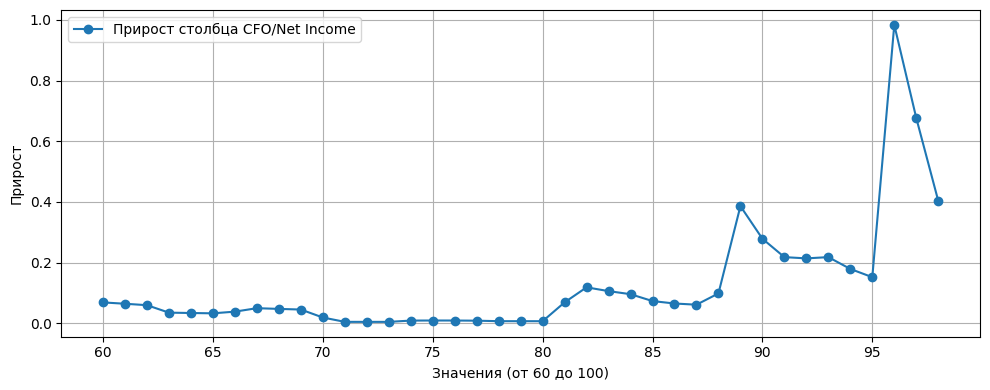

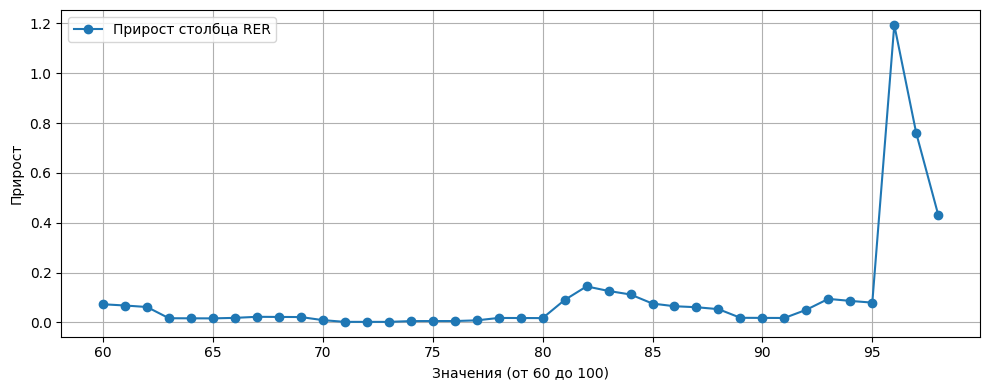

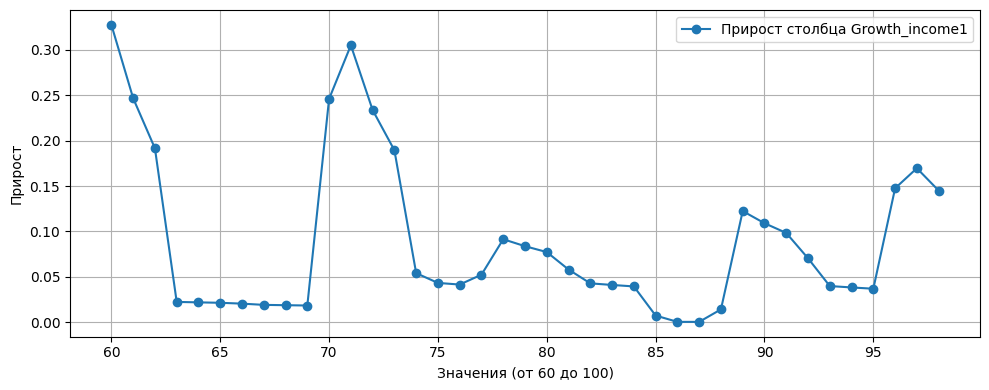

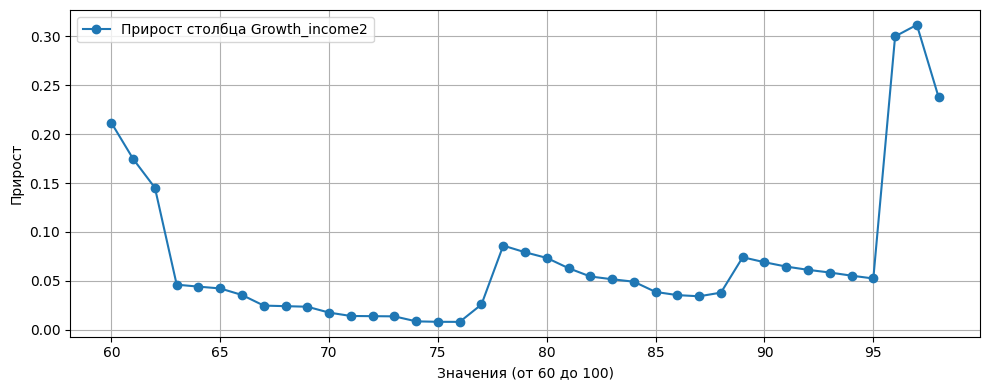

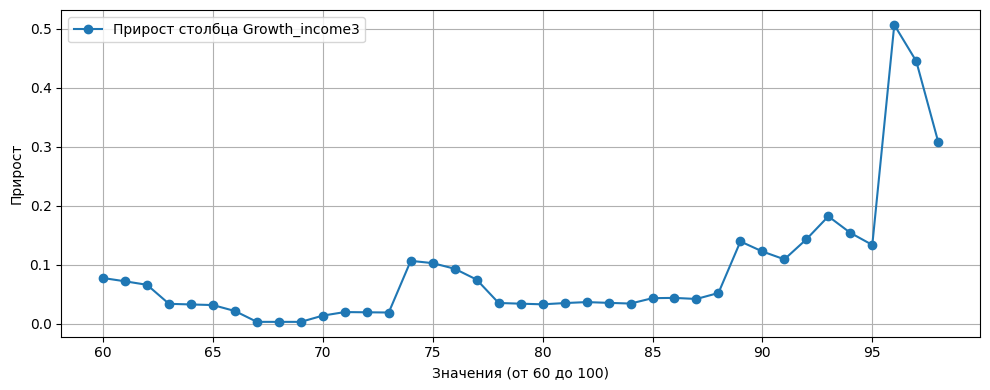

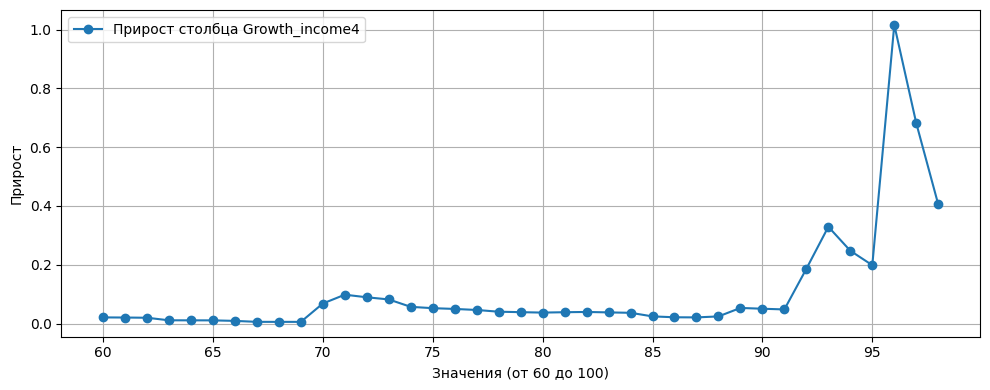

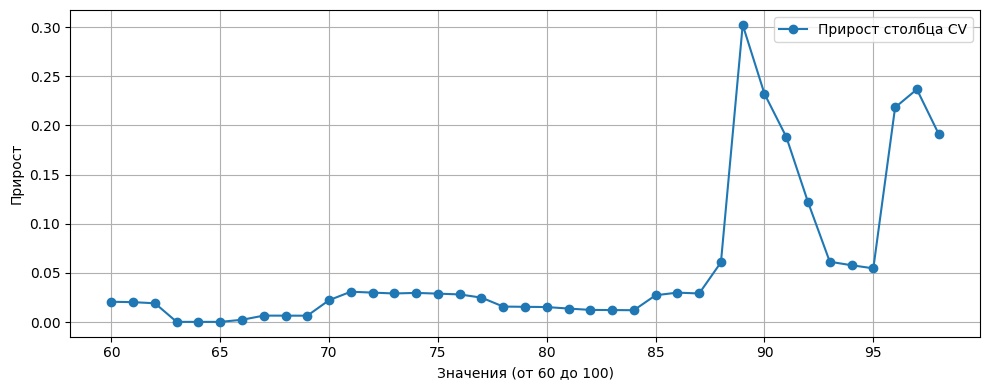

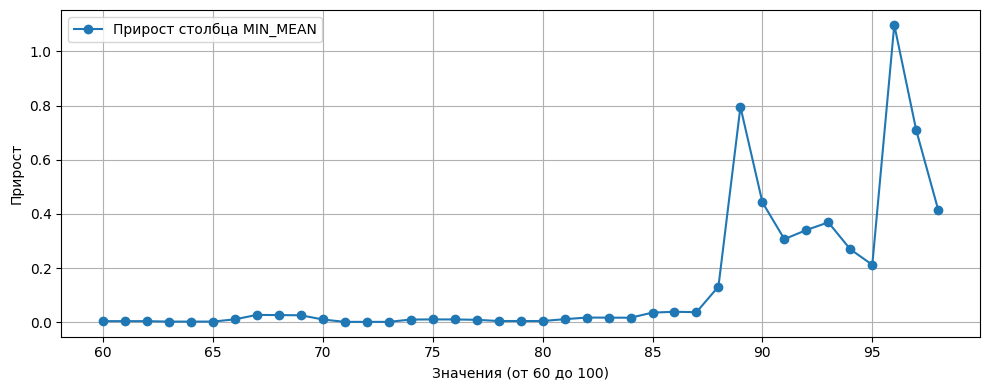

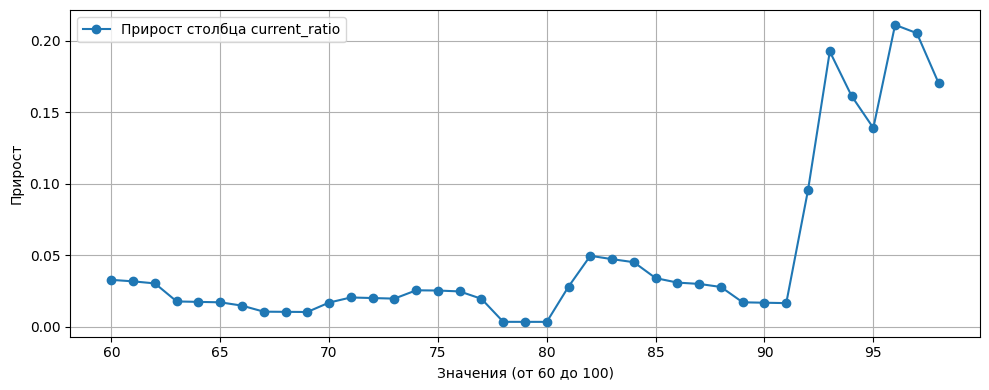

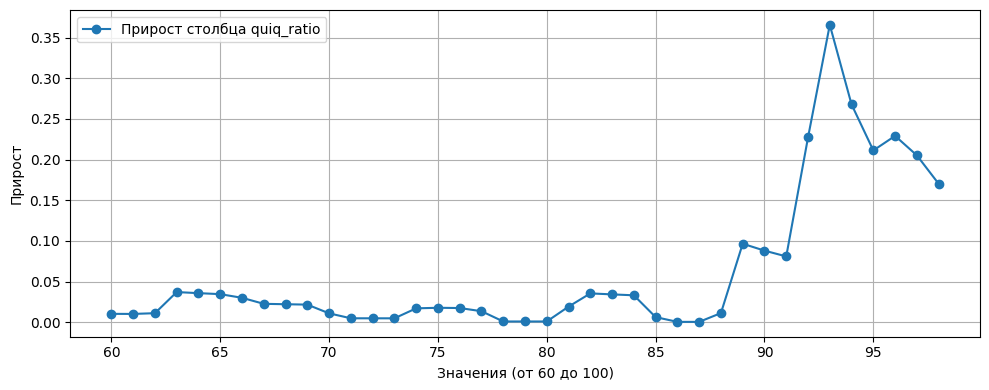

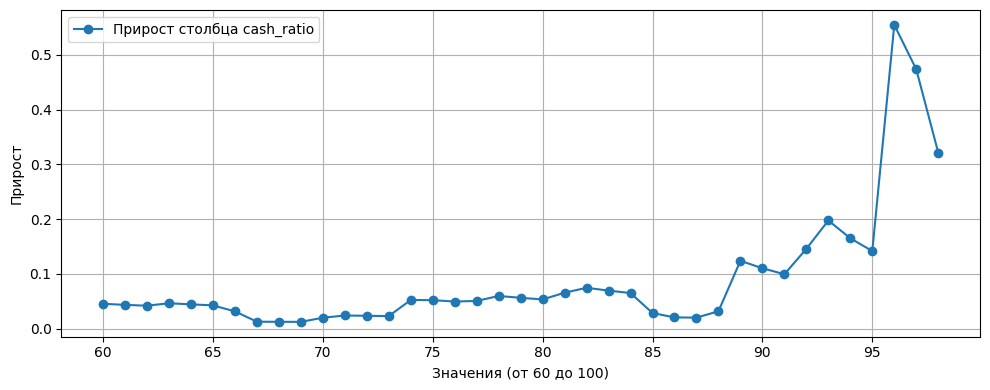

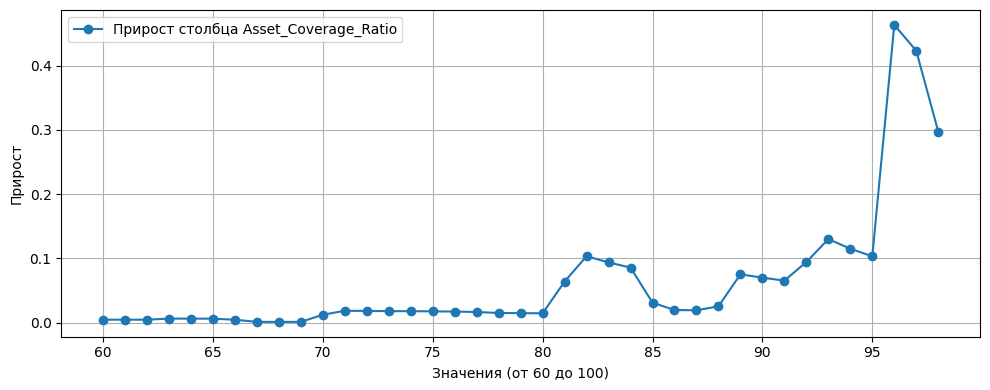

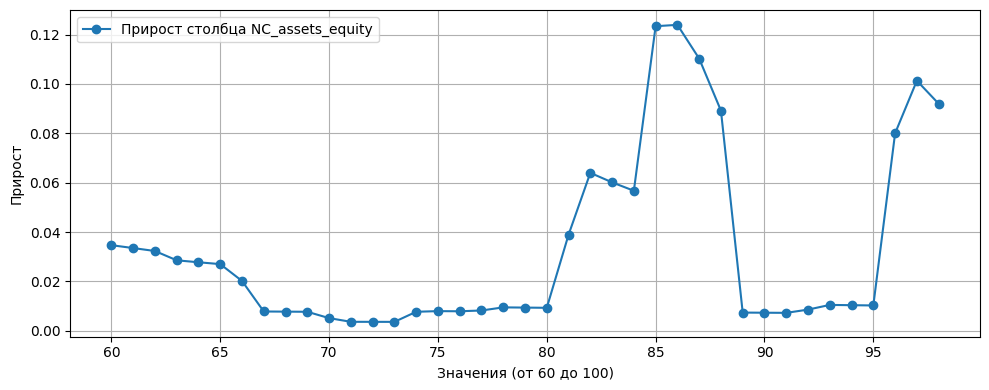

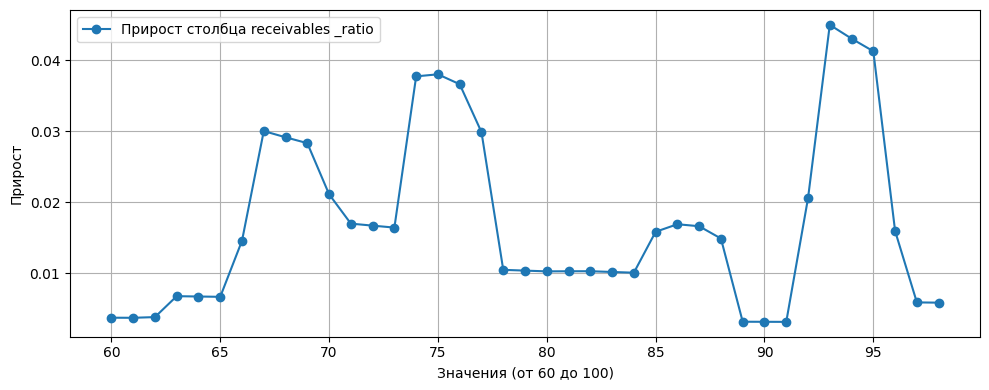

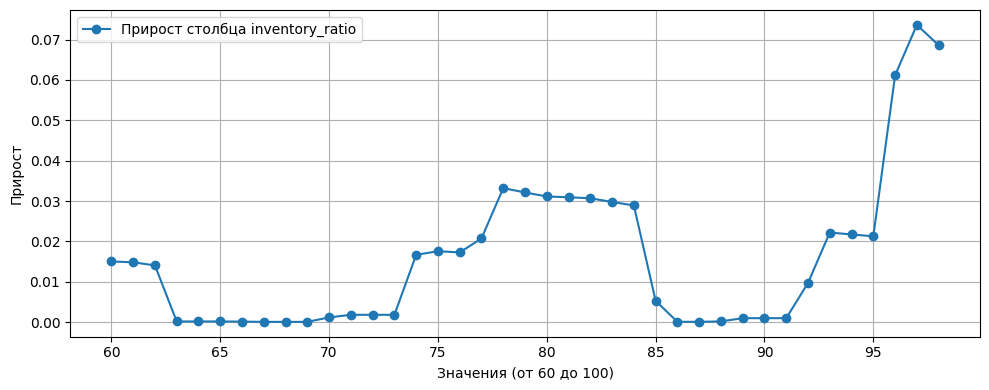

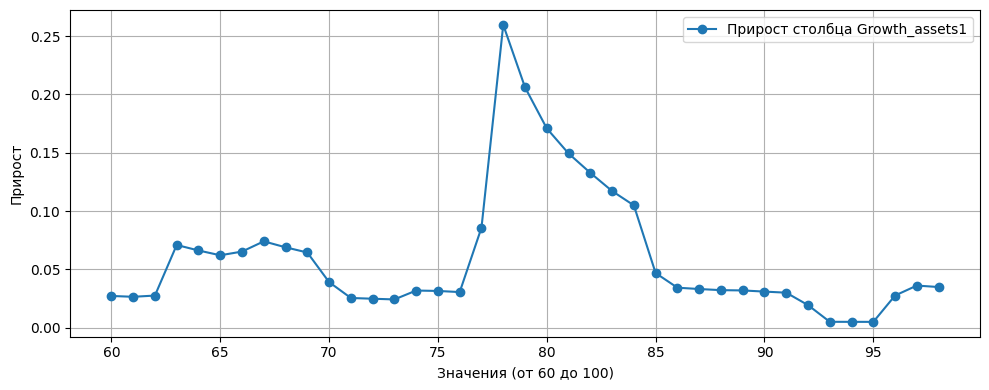

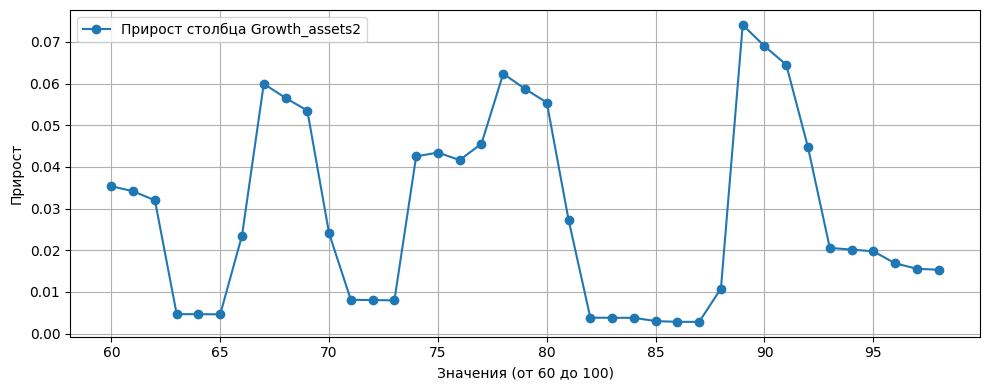

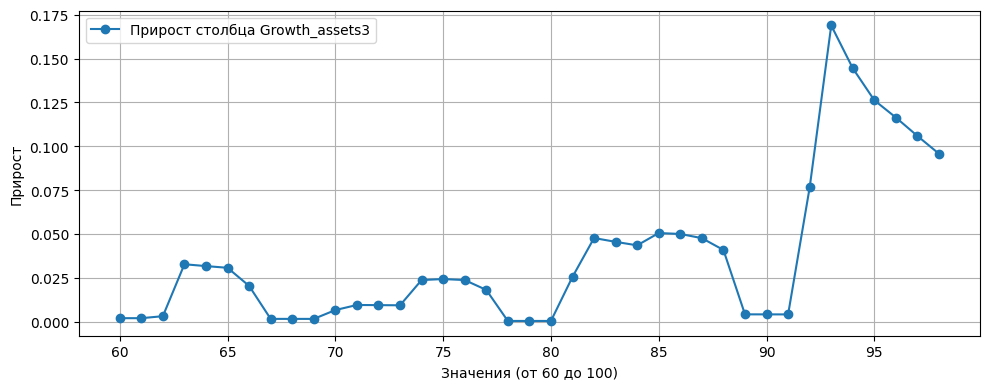

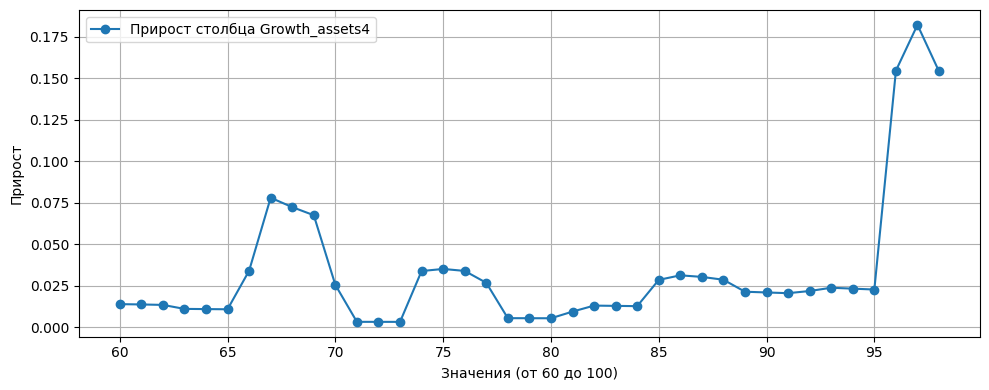

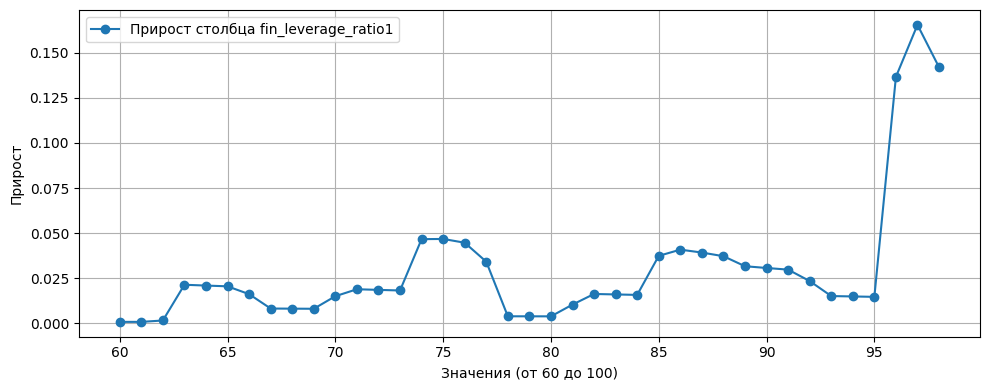

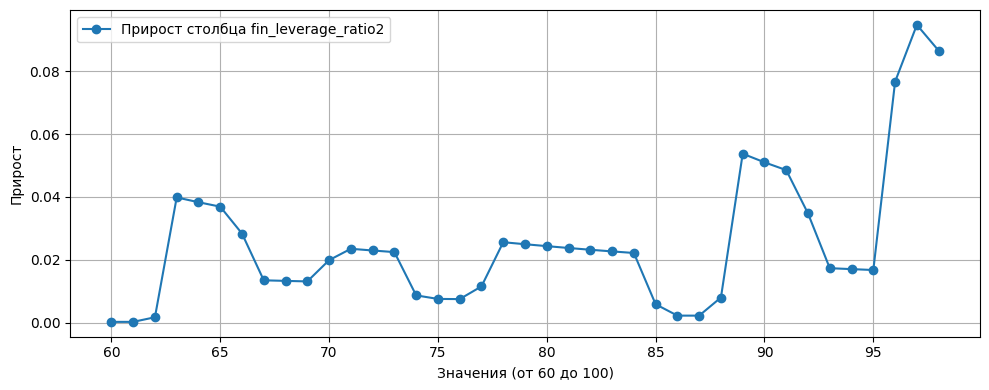

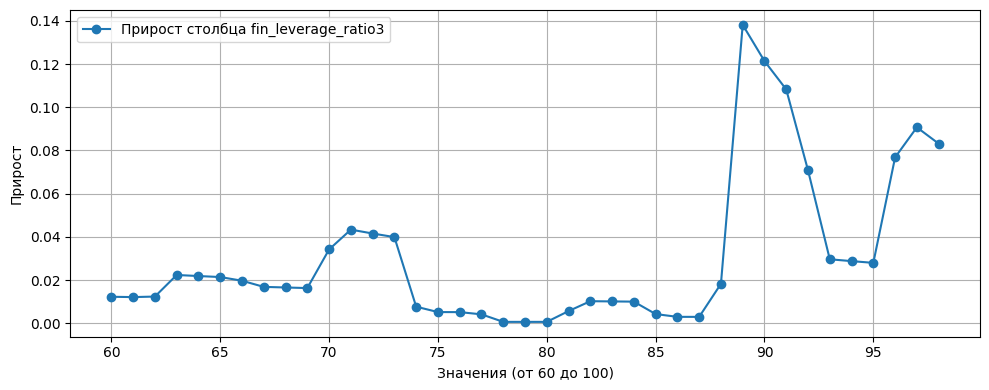

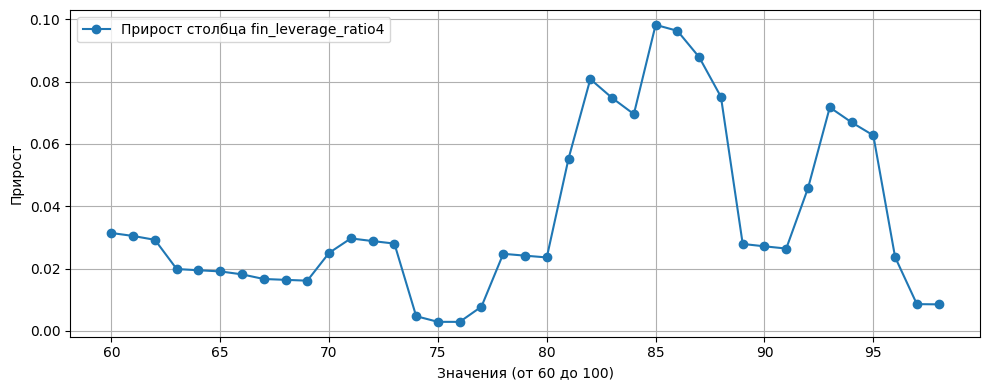

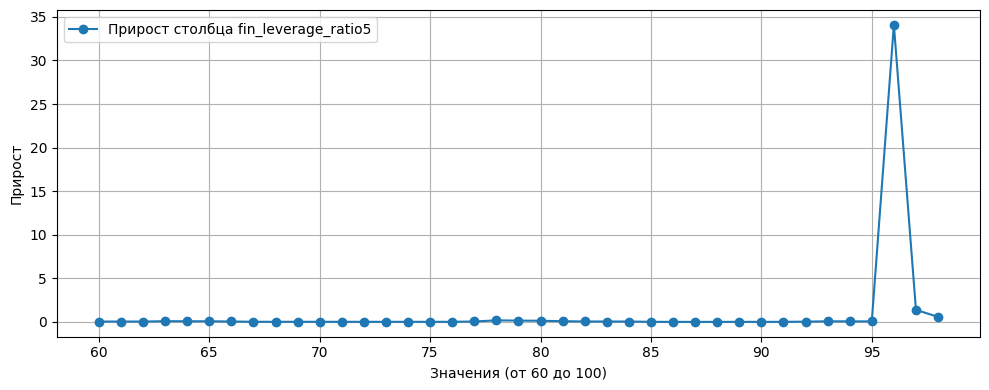

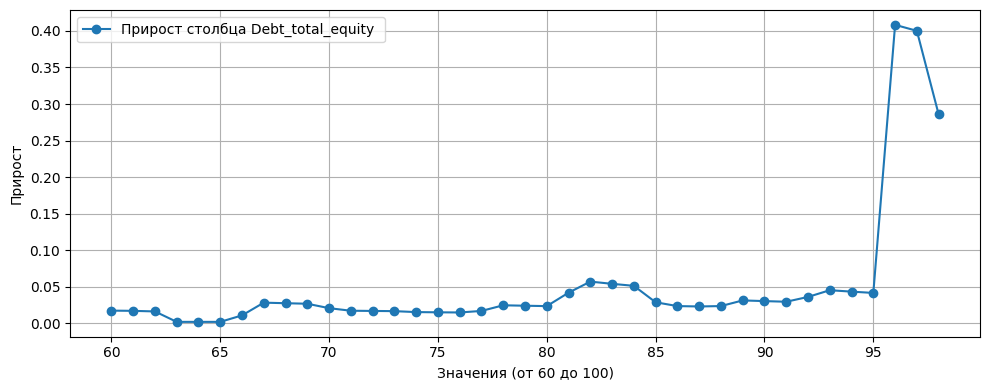

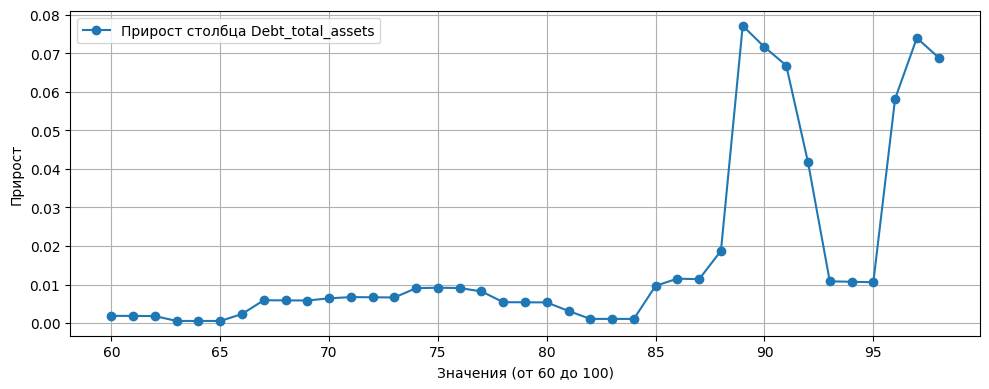

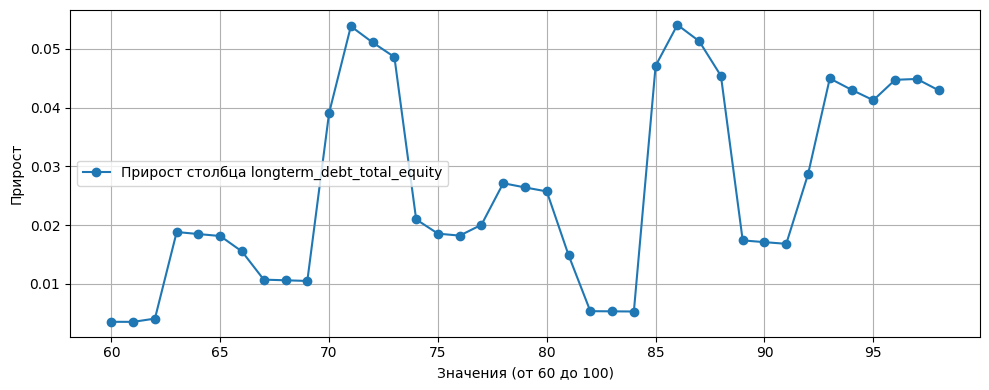

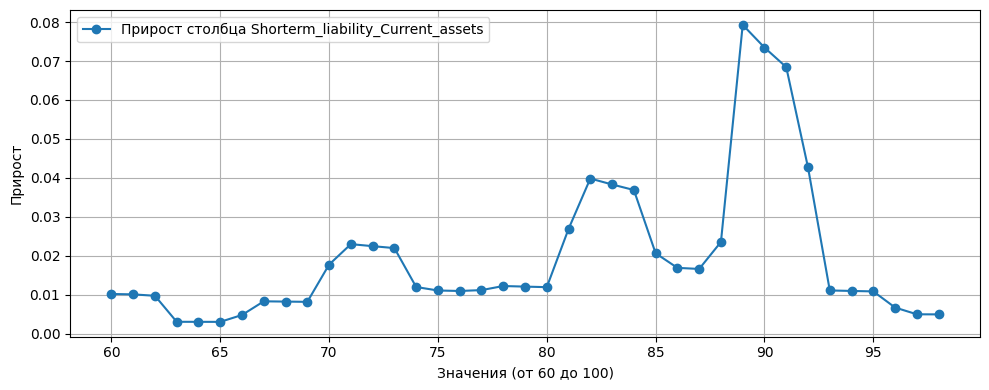

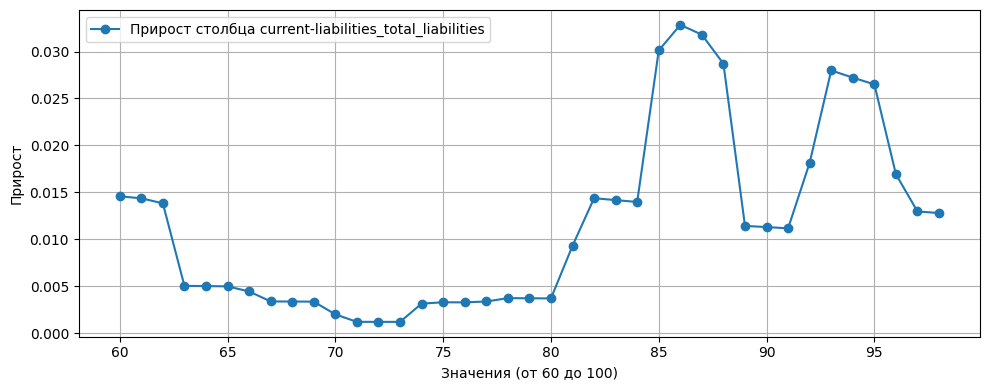

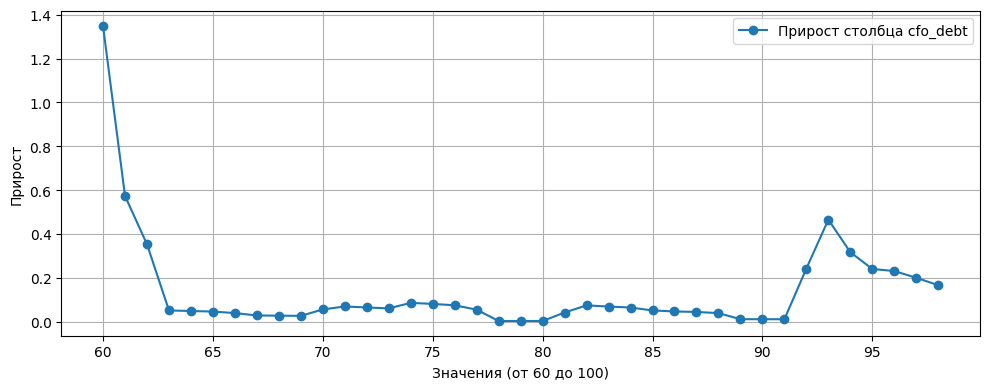

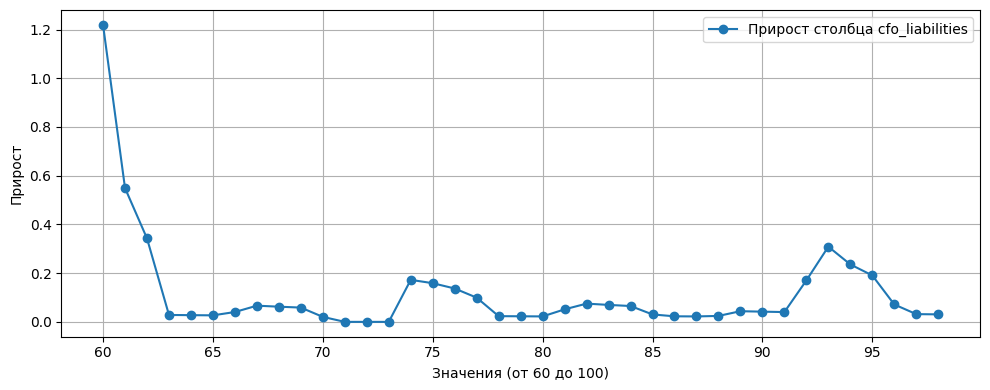

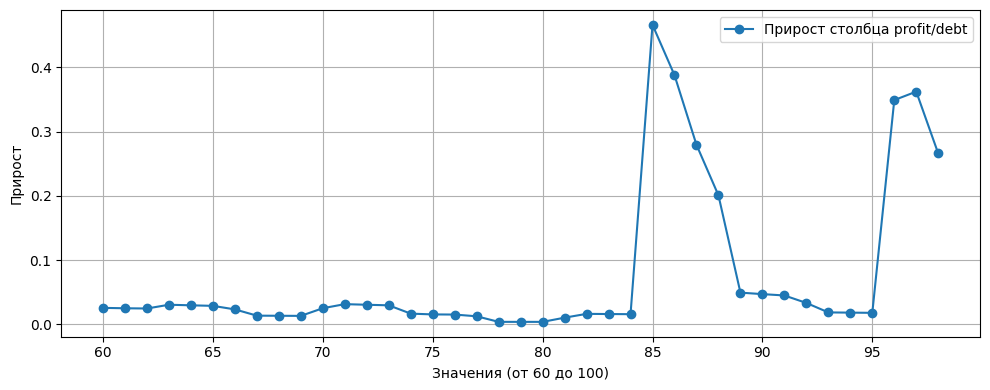

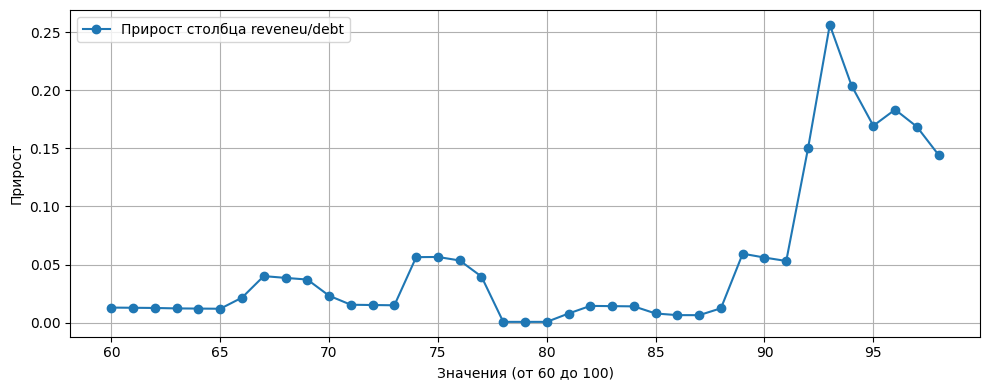

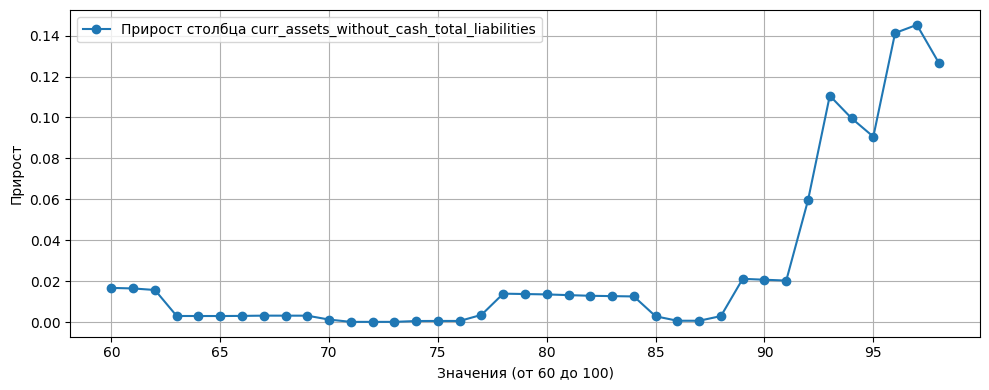

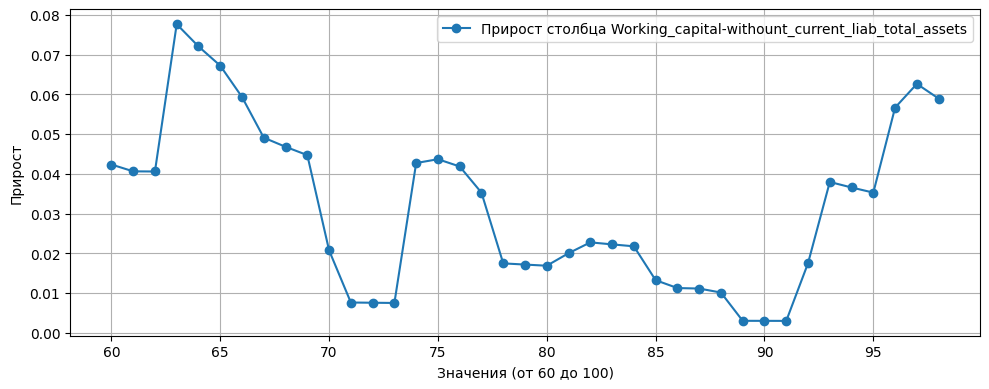

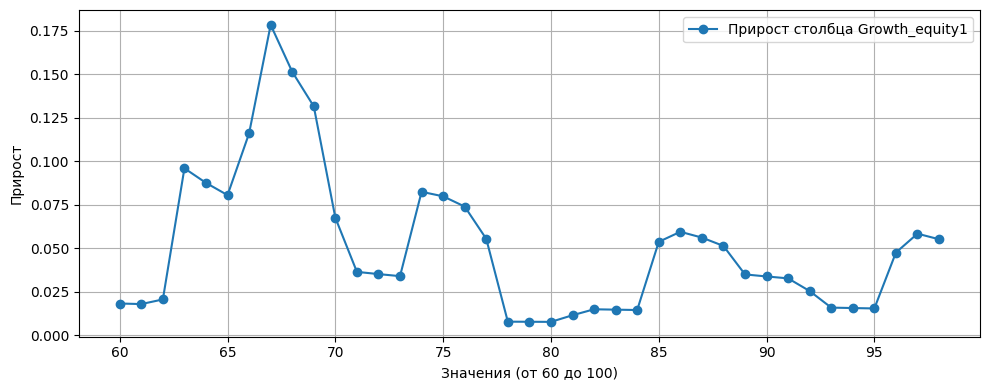

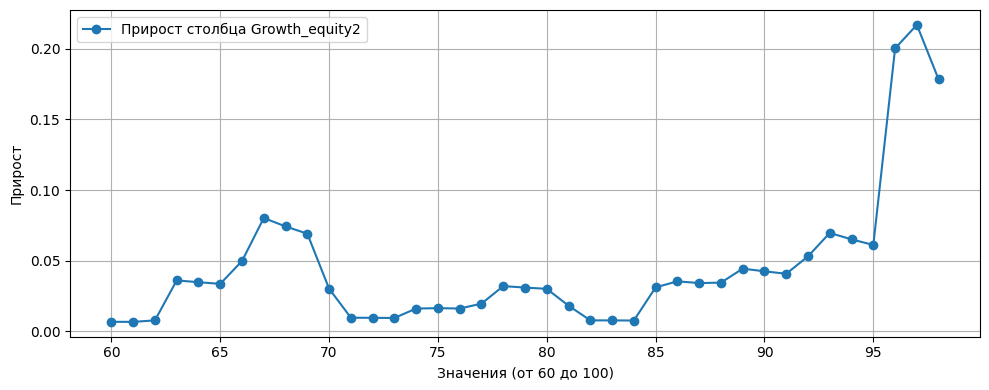

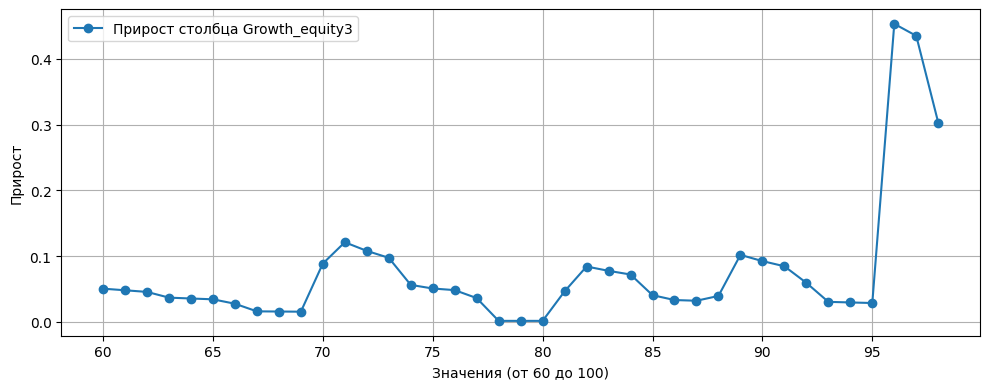

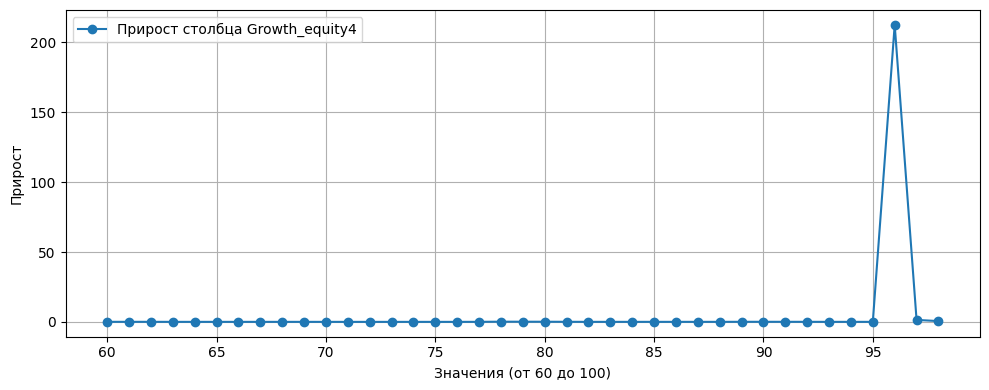

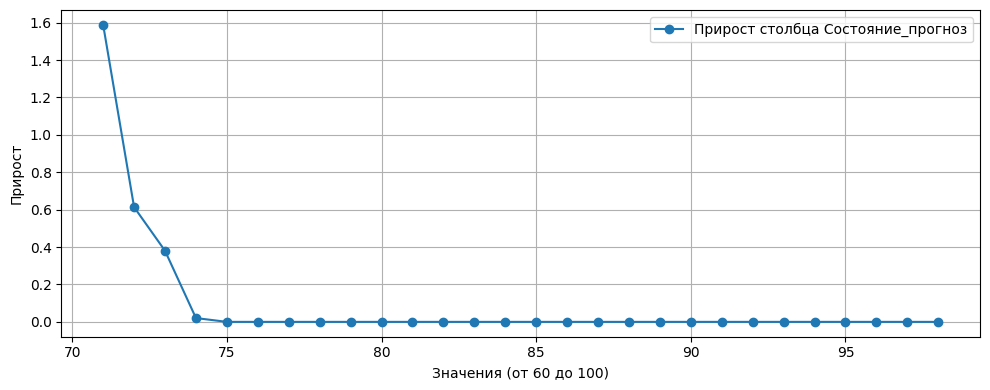

In [344]:
xticks_label = np.arange(60, 100)

for i in range(procent_col.shape[1]):
    local_data = np.diff(procent_col[:, i]) / procent_col[:-1, i]
    plt.figure(figsize=(10, 4))
    plt.plot(xticks_label[:-1], local_data, marker='o', label=f'Прирост столбца {df_B_BB.columns[2:][i]}')
    plt.xlabel('Значения (от 60 до 100)')
    plt.ylabel('Прирост')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [348]:
#определяяю точку максимального прироста 

borders = []
for i in range(procent_col.shape[1]):
    #сичтаю относительный прирост
    local_data = np.diff(procent_col[:, i]) / procent_col[:-1, i]
    
    #нахожу позицию максимального прироста
    idx_peak = np.argmax(local_data)
    
    threshold = xticks_label[idx_peak + 1]
    
    borders.append(threshold)
    
borders = np.array(borders)

In [350]:
#нахожу наблюдения которые надо удалить
indexes_del = set()

for i in range(len(borders)):
    col = df_B_BB.columns[2:][i]
    if borders[i] == 0:
        continue
    else:
        threshold = np.percentile(df_B_BB[col], borders[i])
        indexes = df_B_BB[df_B_BB[col] < threshold].index
        indexes_del.update(indexes)  


In [351]:
compare_pred = df_new.loc[list(indexes_del), :]

In [356]:
#компании рейтинга B BB по которым модель предсказывает дефолт тогда как дефолта нет 

#рассматрерть их качество и попробовать обучить без них

# НАБЛЮДЕНИЕ: попали действиетльно плохие по качетсву компании у которых досоаточно крупные материнские компании
#ПРОБЛЕМА МОДЕЛИ: проблема в том что модель не учитывает качество материнский компаний

In [357]:
for_del_outlines = compare_pred[(compare_pred['Состояние'] == 0) & (compare_pred['Состояние_прогноз'] == 1)]
for_del_outlines

Название компании  Состояние   NPM   ROA   ROE  CFO/Net Income     RER  \
4    "Агрофирма "Рубеж"          0 -0.23 -0.06 -0.25            0.37   -3.94   
6    Аптечная сеть 36,6          0  0.00  0.00 -0.01           87.81 -128.09   
16               Эталон          0 -0.02 -0.01 -0.04           15.18  -25.55   
19              Россети          0  2.46  0.02  0.05            0.00   12.46   
56       СофтЛайн Трейд          0 -0.08 -0.10 -0.62            0.11   -1.62   
89        Росагролизинг          0  0.09  0.01  0.02          -36.22  -10.41   
101            ГК "ЕКС"          0  0.03  0.02  0.36            8.05    2.75   

     Growth_income1  Growth_income2  Growth_income3  ...  \
4              3.62           -1.35            1.64  ...   
6             -0.24           -0.46           -1.23  ...   
16            -0.18           -1.26            3.32  ...   
19            -0.42           -0.16            0.03  ...   
56            -3.25           -0.53            5.74  ...   
89            -0.40            0.15            0.03  ...   
101            0.69            0.15            0.64  ...   

     Рейтинг УК Доходъ_AA  Рейтинг УК Доходъ_B  Рейтинг УК Доходъ_B+  \
4                   False                 True                 False   
6                   False                False                 False   
16                  False                False                 False   
19                   True                False                 False   
56                  False                False                 False   
89                  False                False                 False   
101                 False                False                 False   

     Рейтинг УК Доходъ_BB  Рейтинг УК Доходъ_BB-  Рейтинг УК Доходъ_BBB  \
4                   False                  False                  False   
6                   False                   True                  False   
16                   True                  False                  False   
19                  False                  False                  False   
56                  False                   True                  False   
89                  False                  False                   True   
101                 False                   True                  False   

     Рейтинг УК Доходъ_C  Рейтинг УК Доходъ_CCC  Рейтинг УК Доходъ_D  \
4                  False                  False                False   
6                  False                  False                False   
16                 False                  False                False   
19                 False                  False                False   
56                 False                  False                False   
89                 False                  False                False   
101                False                  False                False   

     Состояние_прогноз  
4                    1  
6                    1  
16                   1  
19                   1  
56                   1  
89                   1  
101                  1  

[7 rows x 78 columns]

# Неудачные попытки

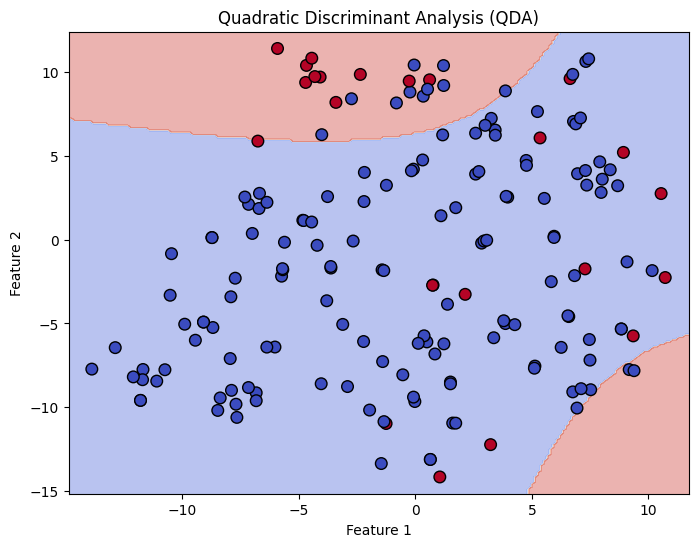

In [404]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(reg_param=0.6)
qda.fit(X_tsne, y)

x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=y, edgecolor='k', s=70, cmap=plt.cm.coolwarm
)

plt.title("Quadratic Discriminant Analysis (QDA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
#BaggingClassifier обучает набор n_estimators 
#базовых слабых моделей base_estimator на случайных подвыборках данных bootstrap=True
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # можно заменить на другую модель
    n_estimators=10,          # число «деревьев» 
    max_samples=1.0,          # доля выборки для каждого эстиматора
    bootstrap=True,           # выбор с возвращением (bagging)
    random_state=42
)

#RandomForestClassifier – частный случай 
#Bagging на деревьях решений с дополнительной случайностью в выборе признаков при разбиении узлов
rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,       # глубина дерева, если None - растёт до упора
    max_features='sqrt',  # число признаков при каждом разбиении
    random_state=42
)

#Boosting
#Boosting – последовательное обучение, где каждая новая модель исправляет ошибки 
#предыдущих. Уменьшает смещение, может быть «капризным» к настройке гиперпараметров.

#xgb_clf = XGBClassifier(
 #   n_estimators=100,
#    learning_rate=0.1,
 #   max_depth=3,
 #   random_state=42,
 #   use_label_encoder=False,
 #   eval_metric='logloss'  # чтобы избежать warning
#)


cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=False,    # чтобы не было большого вывода
    random_state=42
)

ensemble_clf = VotingClassifier(
    estimators=[
        ('bag', bag_clf),
        ('rf', rf_clf),
        ('cat', cat_clf)
    ],
    voting='hard' #большинство голосов а soft усреднение 
)

for clf, label in zip(
    [bag_clf, rf_clf, cat_clf, ensemble_clf],
    ['Bagging', 'RandomForest', 'CatBoost', 'VotingEnsemble']
):
    scores = cross_val_score(clf, X_tsne, y, cv=4, scoring='accuracy')
    print(f"{label} Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


# Создаем сетку для построения контуров
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Список классификаторов и их имена
classifiers = [bag_clf, rf_clf, cat_clf, ensemble_clf]
names = ['Bagging', 'RandomForest', 'CatBoost', 'VotingEnsemble']

# Создаем фигуру с подграфиками (2х2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Определяем цвета для классов (например, два класса: 0 и 1)
cmap_light = ListedColormap(['lightblue', 'lightcoral'])
cmap_bold = ListedColormap(['blue', 'red'])

for idx, (clf, name) in enumerate(zip(classifiers, names)):
    # Обучаем классификатор на PCA-признаках
    clf.fit(X_tsne, y)
    # Получаем предсказания для точек сетки
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    # Строим контурную карту предсказаний (decision boundary)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    # Наносим обучающие точки
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50,
                         edgecolor='k', cmap=cmap_bold)
    ax.set_title(name)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()